# <center>MSDS 7333 - Quantifying the World</center>
## <center>Case Study 4</center>


<center> <b>Asha Saxena, John Heinen, Hari Narayan Sanadhya</b> </center>
<center>October 22, 2018</center>
<br>

## 1. Introduction

Stock Market has been always intereging for analysts to predict the price. The movement of stock prices, are measured in intervals over a period of time. Time series analysis methods are extremely useful for analyzing these special data types. Forecasting model for stock prices is challenging due to the possible seasonality and non-stationarity of the data series.

For case study 4, we are analyzing the the stock price of a major corporation, Western Union. Our goal is to analyze four-year stock data set for Western Union and come up with the appropriate guess of hyperparameters of ARIMA model to get the most optimal result. ARIMA model once trained can be used to forecast the stock price.

## 2. Background

As we begin to forecast the stock price for Western Union for our example here, we need to understand Forecasting.
Forcasting involves predicting values for a variable using its historical data points, it can also involve predicting the change in one variable given the change in the value of another variable. 
Forecasting approaches are primarily qualitative forecasting and/or quantitative forecasting. 
Time series forecasting falls under the category of quantitative forecasting where  applied to a given historical data of a variable to forecast the future values of the same variable. Some time series forecasting techniques used include:

Forecasting involves predicting values for a variable using its historical data points or it can also involve predicting the change in one variable given the change in the value of another variable. Forecasting approaches are primarily categorized into qualitative forecasting and quantitative forecasting. Time series forecasting falls under the category of quantitative forecasting wherein statistical principles and concepts are applied to a given historical data of a variable to forecast the future values of the same variable. Some time series forecasting techniques include:

    Autoregressive (AR) model <br>
    Moving-average (MA) model
    Autoregressive–moving-average (ARMA) model <br>
    Autoregressive integrated moving average (ARIMA) model <br>
    Autoregressive conditional heteroskedasticity (ARCH) model <br>
    Generalized autoregressive conditional heteroskedasticity (GARCH) model <br>
    and many more... <br>

For this case study, the algorithm to analyze the time series data and do forcasting is ARIMA. ARIMA model is a generalization of an ARMA model. Both of these models are fitted to time series data either to better understand the data or for forecasting purpose. ARIMA models are applied in cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity.

The AR part of ARIMA indicates that the evolving variable of interest is regressed on its own lagged (i.e., prior) values. In the ARIMA implementation used, hyperparameter p represents the AR value of ARIMA.

The MA part of ARIMA indicates that the regression error is actually a linear combination of error terms whose values occurred contemporaneously and at various times in the past. In the ARIMA implementation used, hyperparameter q represents the MA value of ARIMA.

The I (for "integrated") indicates that the data values have been replaced with the difference between their values and the previous values (and this differencing process may have been performed more than once). In the ARIMA implementation used, hyperparameter d represents the I value of ARIMA.

The purpose of these hyperparameters (p,d,q) is to make the model fit the data as well as possible.

## 3. Method

For this case study, the analysis was conducted on Western Union stock price (assetCode = WU.N). The data was obtained from Kaggle from an open competition named "two-sigma-financial-news"[https://www.kaggle.com/c/two-sigma-financial-news]. The frequency of the dataset is business day.

#### Step 1: Testing and Ensuring Stationarity (Identification of hyperparameter d)
To model a time series with the Box-Jenkins approach, the series has to be stationary. A stationary time series means a time series without trend, one having a constant mean and variance over time, which makes it easy for predicting values.

**Testing for stationarity** – We test for stationarity using the Augmented Dickey-Fuller unit root test. The p-value resulting from the ADF test has to be less than 0.05 or 5% for a time series to be stationary. If the p-value is greater than 0.05 or 5%, you conclude that the time series has a unit root which means that it is a non-stationary process.

**Differencing** – To convert a non-stationary process to a stationary process, we apply the differencing method. Differencing a time series means finding the differences between consecutive values of a time series data. The differenced values form a new time series dataset which can be tested to uncover new correlations or other interesting statistical properties.

We can apply the differencing method consecutively more than once, giving rise to the “first differences”, “second order differences”, etc.
Below are the 5 rules that summarizes how to precompute proper value of hyperparameter d to be used in ARIMA.<br>
**Rule 1**: If the series has positive autocorrelations out to a high number of lags (say, 10 or more), then it probably needs a higher order of differencing.<br>
**Rule 2**: If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless, then the series does not need a higher order of differencing. If the lag-1 autocorrelation is -0.5 or more negative, the series may be overdifferenced.  BEWARE OF OVERDIFFERENCING.<br>
**Rule 3**: The optimal order of differencing is often the order of differencing at which the standard deviation is lowest. (Not always, though. Slightly too much or slightly too little differencing can also be corrected with AR or MA terms. See rules 6 and 7.)<br>
**Rule 4**: A model with no orders of differencing assumes that the original series is stationary (among other things, mean-reverting). A model with one order of differencing assumes that the original series has a constant average trend (e.g. a random walk or SES-type model, with or without growth). A model with two orders of total differencing assumes that the original series has a time-varying trend (e.g. a random trend or LES-type model).<br>
**Rule 5**: A model with no orders of differencing normally includes a constant term (which allows for a non-zero mean value). A model with two orders of total differencing normally does not include a constant term. In a model with one order of total differencing, a constant term should be included if the series has a non-zero average trend.

We apply the appropriate differencing order (d) to make a non-stationary time series stationary before we can proceed to the next step.

#### Step 2: Identification of p and q
In this step, we identify the appropriate order of Autoregressive (AR) and Moving average (MA) processes by using the Autocorrelation function (ACF) and Partial Autocorrelation function (PACF).  

Rules for identifying the numbers of AR and MA terms:<br>
**Rule 6**: If the partial autocorrelation function (PACF) of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive--i.e., if the series appears slightly "underdifferenced"--then consider adding one or more AR terms to the model. The lag beyond which the PACF cuts off is the indicated number of AR terms.<br>
**Rule 7**: If the autocorrelation function (ACF) of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is negative--i.e., if the series appears slightly "overdifferenced"--then consider adding an MA term to the model. The lag beyond which the ACF cuts off is the indicated number of MA terms.<br>
**Rule 8**: It is possible for an AR term and an MA term to cancel each other's effects, so if a mixed AR-MA model seems to fit the data, also try a model with one fewer AR term and one fewer MA term--particularly if the parameter estimates in the original model require more than 10 iterations to converge. BEWARE OF USING MULTIPLE AR TERMS AND MULTIPLE MA TERMS IN THE SAME MODEL.<br>
**Rule 9**: If there is a unit root in the AR part of the model--i.e., if the sum of the AR coefficients is almost exactly 1--you should reduce the number of AR terms by one and increase the order of differencing by one.<br>
**Rule 10**: If there is a unit root in the MA part of the model--i.e., if the sum of the MA coefficients is almost exactly 1--you should reduce the number of MA terms by one and reduce the order of differencing by one.<br>
**Rule 11**: If the long-term forecasts appear erratic or unstable, there may be a unit root in the AR or MA coefficients.

#### Step 3: Performance Estimation (loss calculation) of ARIMA model using the estimated values of p,d,q
Once we have determined the parameters (p,d,q), we estimate the accuracy of the ARIMA model on a data set. 

#### Step 4: Compute optimatal values of p, d, q hyperparameters programatically
Using brute-force, compute the performance of ARIMA model for different values of p,d,q (min value for each parameter as 0 and maximum value as 3). Get the hyperparameter value for model with best performance. Compare it with the estimated value and if different, select the best value of p,d,q which is not necessary to be the model with best performance or model with the estimated values of p,d,q. Basically, we are trying to implement Occam's razor to choose a model which balances both performance and complexity of the model - i.e. simplest model with best performance.

### 3.1 Data Import

<figure>
    <img src="images/Entire_Stock_data.png">
    <figcaption style="font-size:20px; text-align:center;"><br>Figure 1 - Plot of the entire Western Union Stock Data</figcaption><br>
The above figure (Figure 1) shows the opening price of Western Union stock for the entire data that was present. In 2008, due to the stock market crash, stock market price suddenly dropped. This is an outlier event. So the four years of stock data that we selected was from 2009 to 2013.
</figure>
<br><br>
<figure>
    <img src="images/4_year_stock_data.png">
    <figcaption style="font-size:20px; text-align:center;"><br>Figure 2 - Plot of the Western Union Stock Data on which further analysis is performed</figcaption>
</figure>

### 3.2 Different variables and their analysis
For this case study, we have used the stock opening price of Western Union. Further instead of using the hyperparameter d to handle the non-stationary property of the stock price, we performed some transformation on the stock opening price so that it becomes stationary if not already and then used ARIMA model on it. If the time series data is stationary, then the implementation of ARIMA is with hyperparameter value d as 0 which is similar to ARMA model implementation since in ARMA model, the data is strictly stationary.

#### 3.2.1 ARIMA model on variable "open"
Variable open is the opening price of the stock without any transformation.

For the open variable, we estimated p, d, q to be 1, 0, 0.  For p, Rule 6 was satisfied (using partial correlation function plot i.e. Figure 5, we observe that lag 1 was positive and high, and lag 2 is almost 0), so we determined that the estimated value should be set at 1. On the same plot, we see that after lag 2 the value is stable and as per Rule 11 we do not have to increase the value of AR so the final estimated value of p is 1. For d, as per rule 1, it looks like the dataset is having positive autocorrelations out to a high number of lags (from aotucorrelation plot in Figure 5), the value of d should be greater than 0. But since there are 0 lags in Dickey-Fuller test results shown in Figure 3 for stationary check, we set the estimated value at 0.  For q, Rule 7, from the autocorrelation plot i.e. Figure 5, we did not observe any sharp cutoff and the correlation values are always positive, so we set this estimated value at 0.
<table style="width:100%">
    <tr>
      <td>
        <figure>
            <img src="images/dkt_open.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 3 - Test of Stationarity - Dickey-Fuller Test</figcaption>
        </figure>
      </td>
      <td>
        <figure>
            <img src="images/seasonality_open.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 4 - Verification of Seasonality</figcaption>
        </figure>
      </td>
    </tr>
    <tr>
      <td>
        <figure>
            <img src="images/acf_pacf_open.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 5 - Correlation Plots</figcaption>
        </figure>
      </td>
      <td>
        <figure>
            <img src="images/loss_brute_force_open.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 6 - Results of model performance</figcaption>
        </figure>
      </td>
    </tr>
  <tr>
</table>

#### 3.2.2 ARIMA model on variable "open_no_trend"

Variable open_no_trend is the opening price of the stock with rolling mean removed.  This variable has no transformation applied.

p, d, and q were estimated at 1,0,1. p value was estimated to be 1 because sharp cutoff is observed in  in the partial autocorrelation plot of Figure 9 with a positive value for lag 1 and negative value very close to threshold for lag 2. q value was estimated to be 1 because as per rule 7, the autocorrelation plot in Figure 9 shows that the lag 1 value for autocorrelation is positive and greater than the threshold (dotted line) and value at lag 2 is almost equal to the threshold. q was chosen as 1 keeping the simplest model selection in mind. The lag 2 value of autocorrelation was a little higher, we could have chosen the value of q as 2. As per Rule 11, once the lag 2 value is reached, both the partial autocorrelation and autocorrelation plot lag values appear to be stable so there is not need to increase MA or AR further then what we alreay have. D is set at 0 because according to the p-value and Test Statistic of the Dickey-Fuller Test in Figure 7, there is no evidence against the dataset being non-stationary and from figure 8, we don't abserve any seasonality in the time series.
<table style="width:100%">
    <tr>
      <td>
        <figure>
            <img src="images/dkt_open_no_trend.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 7 - Test of Stationarity - Dickey-Fuller Test</figcaption>
        </figure>
      </td>
      <td>
        <figure>
            <img src="images/seasonality_open_no_trend.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 8 - Verification of Seasonality</figcaption>
        </figure>
      </td>
    </tr>
    <tr>
      <td>
        <figure>
            <img src="images/acf_pacf_open_no_trend.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 9 - Correlation Plots</figcaption>
        </figure>
      </td>
      <td>
        <figure>
            <img src="images/loss_brute_force_open_no_trend.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 10 - Results of model performance</figcaption>
        </figure>
      </td>
    </tr>
  <tr>
</table>

#### 3.2.3 ARIMA model on variable "log_open_no_trend"
Variable log_open_no_trend is the log of opening price of the stock then removing the rolling mean from it. 

Since this is a log transformation of the open_no_trend variable, the Dickey-Fuller test (Figure 11) does not change and so does the autocorrelation and partial autocorrelation plot (Figure 13), so estimated p, d, and q, stay the same as of the open_no_trend variable as 1,0,1.
<table style="width:100%">
    <tr>
      <td>
        <figure>
            <img src="images/dkt_log_open_no_trend.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 11 - Test of Stationarity - Dickey-Fuller Test</figcaption>
        </figure>
      </td>
      <td>
        <figure>
            <img src="images/seasonality_log_open_no_trend.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 12 - Verification of Seasonality</figcaption>
        </figure>
      </td>
    </tr>
    <tr>
      <td>
        <figure>
            <img src="images/acf_pacf_log_open_no_trend.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 13 - Correlation Plots</figcaption>
        </figure>
      </td>
      <td>
        <figure>
            <img src="images/loss_brute_force_log_open_no_trend.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 14 - Results of model performance</figcaption>
        </figure>
      </td>
    </tr>
  <tr>
</table>

#### 3.2.4 ARIMA model on variable "diff_log_open"
Variable diff_log_open is the log of the opening price of the stock, then takes the difference of current opening amount from the previous opening amount, and removes the rolling mean from it.

P, d, and q were estimated at 1,0,1.  From partial correlation plot in Figure 17, a sharp cutoff with a positive lag but instead almost zero value at lag 1, so as per rule 6, there is no AR term. Similarily from the correaltion plot in Figure 17, we observe the zero value at lag 1, so as per rule 7, there is no MA term. But when we see the values after lag 1, it is descreasing constantly and after lag 4 it increases and becomes stable eventually. So as per rule 11 since both partial autocorrelation and autocorrelation has some unstability, the P and Q was estimated at 1. D is set at 0 because according to the p-value and Test Statistic of the Dickey-Fuller Test in Figure 15, there is no evidence against the dataset being non-stationary and from figure 16, we don't abserve any seasonality in the time series. 


<table style="width:100%">
    <tr>
      <td>
        <figure>
            <img src="images/dkt_diff_log_open.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 15 - Test of Stationarity - Dickey-Fuller Test</figcaption>
        </figure>
      </td>
      <td>
        <figure>
            <img src="images/seasonality_diff_log_open.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 16 - Verification of Seasonality</figcaption>
        </figure>
      </td>
    </tr>
    <tr>
      <td>
        <figure>
            <img src="images/acf_pacf_diff_log_open.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 17 - Correlation Plots</figcaption>
        </figure>
      </td>
      <td>
        <figure>
            <img src="images/loss_brute_force_diff_log_open.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 18 - Results of model performance</figcaption>
        </figure>
      </td>
    </tr>
  <tr>
</table>

#### 3.2.5 ARIMA model on variable "diff_open"
Variable diff_open is the difference of current opening amount from the previous opening amount, and removes the rolling mean from it.

P, d, and q were estimated at 1,0,1. From partial correlation plot in Figure 21, a sharp cutoff with a positive lag but instead almost zero value at lag 1, so as per rule 6, there is no AR term. Similarily from the correaltion plot in Figure 21, we observe the zero value at lag 1, so as per rule 7, there is no MA term. But when we see the values after lag 1, it is descreasing constantly and after lag 4 it increases and becomes stable eventually. So as per rule 11 since both partial autocorrelation and autocorrelation has some unstability, the P and Q was estimated at 1. D is set at 0 because according to the p-value and Test Statistic of the Dickey-Fuller Test in Figure 19, there is no evidence against the dataset being non-stationary and from figure 20, we don't abserve any seasonality in the time series.
<table style="width:100%">
    <tr>
      <td>
        <figure>
            <img src="images/dkt_diff_open.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 19 - Test of Stationarity - Dickey-Fuller Test</figcaption>
        </figure>
      </td>
      <td>
        <figure>
            <img src="images/seasonality_diff_open.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 20 - Verification of Seasonality</figcaption>
        </figure>
      </td>
    </tr>
    <tr>
      <td>
        <figure>
            <img src="images/acf_pacf_diff_open.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 21 - Correlation Plots</figcaption>
        </figure>
      </td>
      <td>
        <figure>
            <img src="images/loss_brute_force_diff_open.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 22 - Results of model performance</figcaption>
        </figure>
      </td>
    </tr>
  <tr>
</table>

#### 3.2.6 ARIMA model on variable "log_diff_open"
Variable log_diff_open is the difference of current opening amount from the previous opening amount, and remove the rolling mean from it and then take the log of it.

Since this is a log transformation of the diff_open variable, the Dickey-Fuller test (Figure 23) does not change and so does the autocorrelation and partial autocorrelation plot (Figure 25), so estimated p, d, and q, stay the same as of the diff_open variable as 1,0,1.
<table style="width:100%">
    <tr>
      <td>
        <figure>
            <img src="images/dkt_log_diff_open.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 23 - Test of Stationarity - Dickey-Fuller Test</figcaption>
        </figure>
      </td>
      <td>
        <figure>
            <img src="images/seasonality_log_diff_open.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 24 - Verification of Seasonality</figcaption>
        </figure>
      </td>
    </tr>
    <tr>
      <td>
        <figure>
            <img src="images/acf_pacf_log_diff_open.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 25 - Correlation Plots</figcaption>
        </figure>
      </td>
      <td>
        <figure>
            <img src="images/loss_brute_force_log_diff_open.png">
            <figcaption style="font-size:20px; text-align:center;"><br>Figure 26 - Results of model performance</figcaption>
        </figure>
      </td>
    </tr>
  <tr>
</table>

## 4. Results

### 4.1.1 Final model for variable "open":
From the Figure 6, we see that the best model from brute-force is one with the value of p,d,q as 1,0,0 respectively which matches with the estimated value of the hyperparameters guessed by us. Loss value of the best model is 11.047277404204305. So if the variable used for forcasting model creation is open, then the best performing model is expected to be one with the values of hyperparameters of ARIMA model as p=1, d=0 and q=0.

### 4.1.2 Final model for variable "open_no_trend":
From the Figure 10, we see that the best model from brute-force is one with the value of p,d,q as 3,0,2 respectively whereas the estimated value of the hyperparameters guessed by us were 1,0,1 respectively. Though the best model has the lowest loss (8.919406160270615), we cannot use it as the final value of p,d,q as it fails to follow rule 8 (listed in step 2 of section 3 above) which kind of prohibits from using multiple AR terms and multiple MA terms in the same model. Also  from the same figure, we see that there are simpler models (i.e. models with lower values of p,d,q) have have the approximately the same loss as the loss of the best model. So we selected the optimal values of p,d,q as 102  which has loss value of 8.991325560054348 which is very close to the loss value of the best model.

### 4.1.3 Final model for variable "log_open_no_trend":
From the Figure 14, we see that the best model from brute-force is one with the value of p,d,q as 3,0,2 respectively whereas the estimated value of the hyperparameters guessed by us were 1,0,1 respectively. Though the best model has the lowest loss (0.5463199773724263), we cannot use it as the final value of p,d,q as it fails to follow rule 8 (listed in step 2 of section 3 above) which kind of prohibits from using multiple AR terms and multiple MA terms in the same model. Also from the same figure, we observe from the same figure that there are simpler models (i.e. models with lower values of p,d,q) have have the approximately the same loss as the loss of the best model. In this case, the final model that we selected, matches with the estimated values of p,d,q as 1,0,1 which has loss value (0.5582168703478716) very close to the loss value of the best model.

### 4.1.4 Final model for variable "diff_open":
From the Figure 18, we see that the best model from brute-force is one with the value of p,d,q as 3,0,1 respectively whereas the estimated value of the hyperparameters guessed by us were 1,0,1 respectively. Though the best model has the lowest loss (0.552285857071832), we observe from the same figure that there are simpler models (i.e. models with lower values of p,d,q) have have the approximately the same loss as the loss of the best model. In this case, the final model that we selected matches with the estimated values of p,d,q as 1,0,1 which has loss value (0.560747197989398) very close to the loss value of the best model.

### 4.1.5 Final model for variable "diff_open":
From the Figure 22, we see that the best model from brute-force is one with the value of p,d,q as 3,0,2 respectively whereas the estimated value of the hyperparameters guessed by us were 1,0,1 respectively. Though the best model has the lowest loss (8.987194998330374), we cannot use it as the final value of p,d,q as it fails to follow rule 8 (listed in step 2 of section 3 above) which kind of prohibits from using multiple AR terms and multiple MA terms in the same model. Also  from the same figure, we see that there are simpler models (i.e. models with lower values of p,d,q) have have the approximately the same loss as the loss of the best model. So we selected the optimal values of p,d,q as 3,0,1  which has loss value of 8.991082304237375 which is very close to the loss value of the best model.

### 4.1.6 Final model for variable "log_diff_open":
From the Figure 26, we see that the best model from brute-force is one with the value of p,d,q as 3,0,2 respectively whereas the estimated value of the hyperparameters guessed by us were 1,0,1 respectively. Though the best model has the lowest loss (2.425232542436368), we cannot use it as the final value of p,d,q as it fails to follow rule 8 (listed in step 2 of section 3 above) which kind of prohibits from using multiple AR terms and multiple MA terms in the same model. Also  from the same figure, we see that there are simpler models (i.e. models with lower values of p,d,q) have have the approximately the same loss as the loss of the best model. So we selected the optimal values of p,d,q as 3,0,1  which has loss value of 2.438094155134251 which is very close to the loss value of the best model.

## 5. Conclusion and Future work:

For this case study, analysis of stock price of Western Union is performed by using ARIMA models which is a very common model for time series data analysis. The study involved downloading the stock market data for an organization for a period of four years. We then ploted this data to analyze the presence of seasonality in the data. Then using the Dickey-Fuller Test, the data was for being stationary or not. The stock price was confirmed to have some stationary component in it which was then handled by either using non-zero value of hyperparameter d or by performing some transformation on the data. The ARIMA model was then trained on the data and the performance was measured in terms of loss. The hyperparameters of ARIMA model were tuned and the final values of hyperparameters p,d,q was determined. 

This model can now be extended further to perform forcasting of the stock price for future period. Since we have trained the model only on data for 4 years (2009- 2013), we can use the data for year 2014 as the test data and determine how accurate the forcasting is from the ARIMA model. As of now, we have just selected the optimal values of hyperparameters for time series analysis but have not used it for forcasting. Based of the forcasting performance, the final variable and model (we have used 6 different variables which includes opening stock price and its various transformations to have 6 different models) can be selected.

Other models like ARCH or GARCH can also be used to analyze this data and then the best performing model can be picked for forcasting if prediction of future stock price is the motive of the study. This case study was aimed to find the optimal values of hyperparameter of ARIMA model for the given dataset.

## 6. Appendix (Code) 
This code can only be executed on Kaggle website as the dataset is not available for public download and is a part of active competition.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large'}
pylab.rcParams.update(params)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))


# Any results you write to the current directory are saved as output.

['marketdata_sample.csv', 'news_sample.csv']


In [2]:
from kaggle.competitions import twosigmanews
# You can only call make_env() once, so don't lose it!
env = twosigmanews.make_env()
print('Done!')

Loading the data... This could take a minute.
Done!
Done!


In [3]:
(market_train_df, news_train_df) = env.get_training_data()

In [4]:
market_train, news_train = market_train_df.copy(), news_train_df.copy()

In [5]:
market_train.describe()

volume      ...           universe
count  4.072956e+06      ...       4.072956e+06
mean   2.665312e+06      ...       5.949365e-01
std    7.687606e+06      ...       4.909044e-01
min    0.000000e+00      ...       0.000000e+00
25%    4.657968e+05      ...       0.000000e+00
50%    9.821000e+05      ...       1.000000e+00
75%    2.403165e+06      ...       1.000000e+00
max    1.226791e+09      ...       1.000000e+00

[8 rows x 13 columns]

In [6]:
market_train.head()

time   ...    universe
0 2007-02-01 22:00:00+00:00   ...         1.0
1 2007-02-01 22:00:00+00:00   ...         0.0
2 2007-02-01 22:00:00+00:00   ...         1.0
3 2007-02-01 22:00:00+00:00   ...         1.0
4 2007-02-01 22:00:00+00:00   ...         1.0

[5 rows x 16 columns]

In [7]:
market_train.columns

Index(['time', 'assetCode', 'assetName', 'volume', 'close', 'open',
       'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsClosePrevMktres10', 'returnsOpenPrevMktres10',
       'returnsOpenNextMktres10', 'universe'],
      dtype='object')

In [8]:
news_train.head()

time      ...       volumeCounts7D
0 2007-01-01 04:29:32+00:00      ...                    7
1 2007-01-01 07:03:35+00:00      ...                    3
2 2007-01-01 11:29:56+00:00      ...                   17
3 2007-01-01 12:08:37+00:00      ...                   15
4 2007-01-01 12:08:37+00:00      ...                    0

[5 rows x 35 columns]

In [9]:
market_train[['assetCode', 'assetName']].tail(50)

assetCode                          assetName
4072906     WRI.N        Weingarten Realty Investors
4072907     WRK.N                        WestRock Co
4072908     WSM.N                Williams-Sonoma Inc
4072909     WST.N   West Pharmaceutical Services Inc
4072910    WTFC.O            Wintrust Financial Corp
4072911     WTR.N                   Aqua America Inc
4072912      WU.N                   Western Union Co
4072913    WUBA.N                         58.com Inc
4072914    WWAV.N                 WhiteWave Foods Co
4072915     WWD.O                       Woodward Inc
4072916     WWE.N  World Wrestling Entertainment Inc
4072917     WWW.N           Wolverine World Wide Inc
4072918      WY.N                    Weyerhaeuser Co
4072919     WYN.N             Wyndham Worldwide Corp
4072920    WYNN.O                   Wynn Resorts Ltd
4072921       X.N           United States Steel Corp
4072922     XEC.N                  Cimarex Energy Co
4072923     XEL.N                    Xcel Energy Inc
4072924     XHR.N         Xenia Hotels & Resorts Inc
4072925      XL.N                       XL Group Ltd
4072926    XLNX.O                         Xilinx Inc
4072927    XLRN.O               Acceleron Pharma Inc
4072928    XNCR.O                         Xencor Inc
4072929     XOG.O           Extraction Oil & Gas Inc
4072930     XOM.N                   Exxon Mobil Corp
4072931     XON.N                      Intrexon Corp
4072932     XPO.N                  XPO Logistics Inc
4072933    XRAY.O                Dentsply Sirona Inc
4072934    XXIA.O                               Ixia
4072935     XYL.N                          Xylem Inc
4072936    YELP.N                           Yelp Inc
4072937    YHOO.O                         Altaba Inc
4072938    YNDX.O                          Yandex NV
4072939     YPF.N                             YPF SA
4072940     YRD.N                            Unknown
4072941     YUM.N                    Yum! Brands Inc
4072942    YUMC.N             Yum China Holdings Inc
4072943      YY.O                             YY Inc
4072944       Z.O                   Zillow Group Inc
4072945    ZAYO.N            Zayo Group Holdings Inc
4072946     ZBH.N         Zimmer Biomet Holdings Inc
4072947    ZBRA.O            Zebra Technologies Corp
4072948     ZEN.N                        Zendesk Inc
4072949      ZG.O                   Zillow Group Inc
4072950    ZION.O                      Zions Bancorp
4072951    ZIOP.O              ZIOPHARM Oncology Inc
4072952    ZLTQ.O              ZELTIQ Aesthetics Inc
4072953    ZNGA.O                          Zynga Inc
4072954     ZTO.N                            Unknown
4072955     ZTS.N                         Zoetis Inc

In [10]:
# WU.N 	Western Union Co
wu_df = market_train[market_train.assetCode.apply(lambda x: x.lower().find("wu.n") != -1)][['assetCode', 
    'assetName', 'open']].reset_index(drop=True)
wu_df.index=market_train[market_train.assetCode.apply(lambda x: x.lower().find("wu.n") != -1)]['time']
wu_df.index  = wu_df.index.date

In [11]:
# Verification of the dataset that contains stock on only a single asset
wu_df.assetCode.unique()

array(['WU.N'], dtype=object)

In [12]:
# Preview of the dataset
wu_df.head()

assetCode         assetName   open
2007-02-01      WU.N  Western Union Co  22.10
2007-02-02      WU.N  Western Union Co  23.38
2007-02-05      WU.N  Western Union Co  23.15
2007-02-06      WU.N  Western Union Co  22.75
2007-02-07      WU.N  Western Union Co  22.50

In [13]:
wu_df['diff_in_open_from_previous_day'] = wu_df['open'].sub(wu_df['open'].shift())
wu_df.diff_in_open_from_previous_day.fillna(0, inplace=True) # Since the first value will be NaN, impute it with zero
wu_df.head()

assetCode              ...               diff_in_open_from_previous_day
2007-02-01      WU.N              ...                                         0.00
2007-02-02      WU.N              ...                                         1.28
2007-02-05      WU.N              ...                                        -0.23
2007-02-06      WU.N              ...                                        -0.40
2007-02-07      WU.N              ...                                        -0.25

[5 rows x 4 columns]

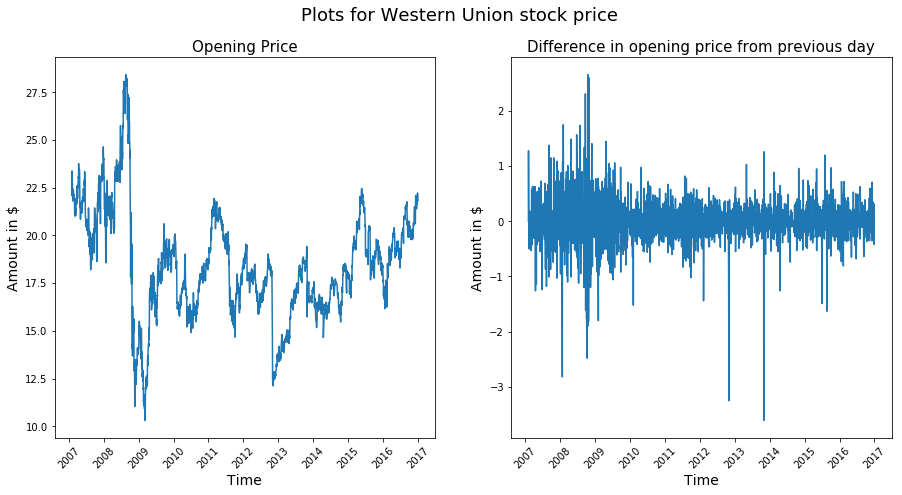

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(15,7))
wu_df['open'].plot(ax=axes[0])
wu_df['diff_in_open_from_previous_day'].plot(ax=axes[1])
fig.suptitle("Plots for Western Union stock price", size=18)
axes[0].set_title("Opening Price", size=15)
axes[1].set_title("Difference in opening price from previous day", size=15)
plt.setp(axes[0].get_xticklabels(), rotation=45)
plt.setp(axes[1].get_xticklabels(), rotation=45)
axes[0].set_xlabel('Time', size=14)
axes[1].set_xlabel('Time', size=14)
axes[0].set_ylabel('Amount in $', size=14)
axes[1].set_ylabel('Amount in $', size=14)
plt.show()

Since around the middle of 2008, the stock market crashed which is an event which was not predictable and caused unexpected price drop of stocks in 2008,  the four years period we chose was from 2009 to 2013.

In [15]:
# Get Data for four years
wu_df = wu_df.loc[pd.datetime(2009, 1, 1).date():pd.datetime(2013, 1, 1).date()]
wu_df.head()

assetCode              ...               diff_in_open_from_previous_day
2009-01-02      WU.N              ...                                         0.23
2009-01-05      WU.N              ...                                         0.76
2009-01-06      WU.N              ...                                        -0.34
2009-01-07      WU.N              ...                                         0.77
2009-01-08      WU.N              ...                                        -0.64

[5 rows x 4 columns]

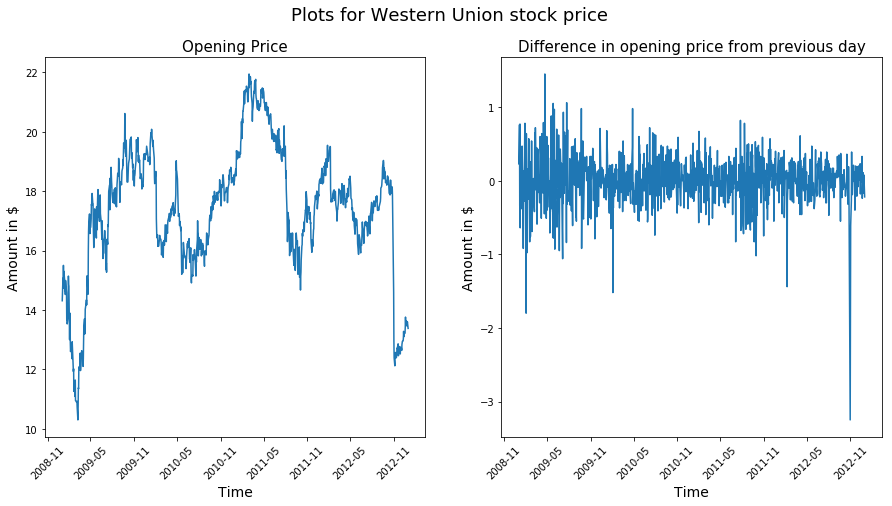

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(15,7))
wu_df['open'].plot(ax=axes[0])
wu_df['diff_in_open_from_previous_day'].plot(ax=axes[1])
fig.suptitle("Plots for Western Union stock price", size=18)
axes[0].set_title("Opening Price", size=15)
axes[1].set_title("Difference in opening price from previous day", size=15)
plt.setp(axes[0].get_xticklabels(), rotation=45)
plt.setp(axes[1].get_xticklabels(), rotation=45)
axes[0].set_xlabel('Time', size=14)
axes[1].set_xlabel('Time', size=14)
axes[0].set_ylabel('Amount in $', size=14)
axes[1].set_ylabel('Amount in $', size=14)
plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, seasonPeriod = 12, label=None):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(seasonPeriod).mean()
    rolstd = timeseries.rolling(seasonPeriod).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    if(label==None):
        plt.title('Rolling Mean & Standard Deviation')
    else:
        plt.title('Rolling Mean & Standard Deviation: ' + label)
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
def plot_seasonality(timeseries, freq=52, label=None):
    timeseries.index = pd.to_datetime(timeseries.index)
    decomposition = seasonal_decompose(timeseries, freq=freq )
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    plt.figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.subplot(411)
    plt.plot(timeseries, label='Original')
    if(label==None):
        plt.title('Plot of Seasonality')
    else:
        plt.title('Plot of Seasonality: ' + label)
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()

In [19]:
from statsmodels.tsa.stattools import acf, pacf
def plot_autocorrelation(timeSeries, label=None):
    acf_air_plot = acf(timeSeries.dropna(), nlags=20)
    #Plot ACF: 
    plt.figure(figsize=(20, 4))
    plt.subplot(121) 
    plt.plot(acf_air_plot)
    plt.xticks(np.arange(21))
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(acf_air_plot)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(acf_air_plot)),linestyle='--',color='gray')
    for i in range(1,20):
        plt.axvline(x=i,linestyle=':',color='gray')
    if(label==None):
        plt.title('Autocorrelation Function')
    else:
        plt.title('Autocorrelation Function: ' + label)

In [20]:
def plot_partial_autocorrelation(timeSeries, label=None):
    pacf_air_plot = pacf(timeSeries.dropna(), nlags=20)
    #Plot ACF: 
    plt.figure(figsize=(20, 4))

    plt.subplot(121) 
    plt.plot(pacf_air_plot)
    plt.xticks(np.arange(21))
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeSeries)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(timeSeries)),linestyle='--',color='gray')
    for i in range(1,20):
        plt.axvline(x=i,linestyle=':',color='gray')
    if(label==None):
        plt.title('Partial Autocorrelation Function')
    else:
        plt.title('Partial Autocorrelation Function: ' + label)

In [21]:
from statsmodels.tsa.arima_model import ARIMA
def fitArima(timeseries, p=1, d=0, q=1):
    model = ARIMA(timeseries, order=(p, d, q))
    model_fit = model.fit(disp=0)
    print(model_fit.summary())
    # plot residual errors
    residuals = pd.DataFrame(model_fit.resid)
    residuals.plot()
    plt.xticks(rotation=45)
    plt.show()
    residuals.plot(kind='kde')
    plt.show()
    print(residuals.describe())

In [22]:
def run_bruteForce(timeseries, d_start=0, label=None):
    loss_best = 1E16
    best_ints = [-1,-1,-1]
    pdq_values=[]
    loss_values=[]
    for p in range(4):
        for d in range(d_start, 3):
            for q in range(3):
                model = ARIMA(timeseries, order=(p, d, q))  
                try:
                    results_ARIMA = model.fit(disp=-1)
                except ValueError:
                    pass
                except:
                    pass
                plt.plot(timeseries)
                plt.plot(results_ARIMA.fittedvalues, color='red')
                x=pd.DataFrame(results_ARIMA.fittedvalues)
                x=x.join(timeseries)
                x['out']=(x.iloc[:,0]-x.iloc[:,1])**2
                loss=np.sqrt(x['out'].sum())
                pdq_values.append(str(p)+str(d)+str(q))
                loss_values.append(loss)
                plt.title('RSS: %.4f'% loss)
                plt.xticks(rotation=45)
                if loss < loss_best:
                    print(loss)
                    loss_best = loss
                    best_ints=[p,d,q]
                plt.show()
                print(p,d,q)
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)
    ax.plot(pdq_values, loss_values, marker='o', linestyle='-', color='b')
    ax.axvline(x=str(best_ints[0]) + str(best_ints[1]) + str(best_ints[2]), color='r', linestyle='--')
    ax.tick_params(labelrotation=45)
    ax.set_xlabel("pdq values")
    ax.set_ylabel("Loss values")
    if(label==None):
        ax.set_title('Plot of Loss for each pdq values')
    else:
        ax.set_title('Plot of Loss for each pdq values: ' + label)
    plt.show()
    return({'loss_best':loss_best, 'best_ints': best_ints, "pdq_values": pdq_values, "loss_values": loss_values})

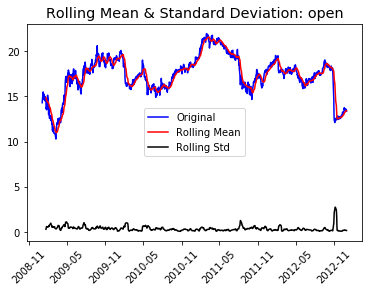

Results of Dickey-Fuller Test:
Test Statistic                   -2.343597
p-value                           0.158292
#Lags Used                        0.000000
Number of Observations Used    1005.000000
Critical Value (1%)              -3.436873
Critical Value (5%)              -2.864420
Critical Value (10%)             -2.568304
dtype: float64


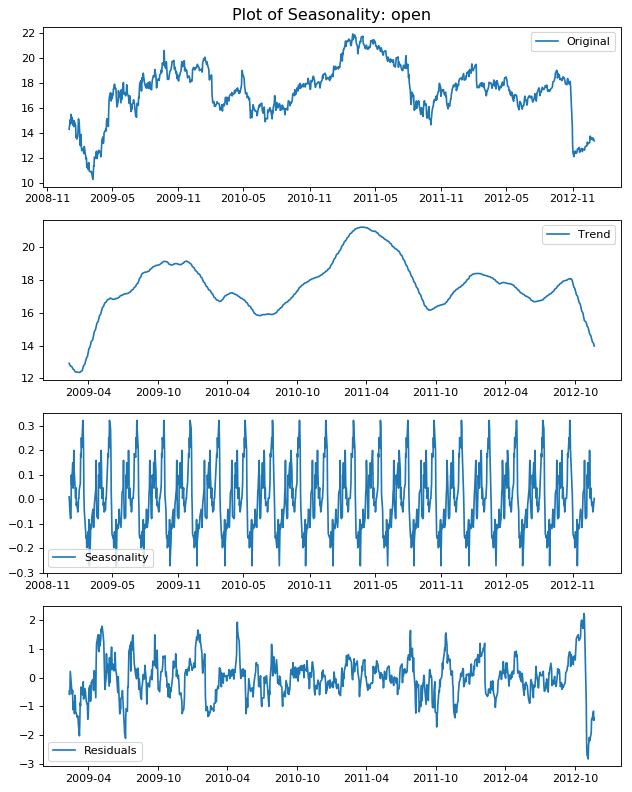

In [23]:
test_stationarity(wu_df.open, label='open')
plot_seasonality(wu_df.open, label='open')

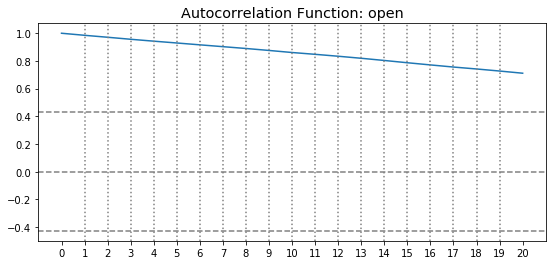

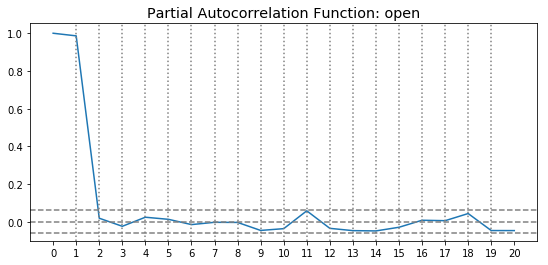

In [24]:
plot_autocorrelation(wu_df.open, 'open')
plot_partial_autocorrelation(wu_df.open, 'open')

/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

                              ARMA Model Results                              
Dep. Variable:                   open   No. Observations:                 1006
Model:                     ARMA(1, 0)   Log Likelihood                -341.999
Method:                       css-mle   S.D. of innovations              0.339
Date:                Mon, 22 Oct 2018   AIC                            689.999
Time:                        19:22:11   BIC                            704.740
Sample:                    01-02-2009   HQIC                           695.600
                         - 12-31-2012                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8334      0.936     17.977      0.000      14.998      18.669
ar.L1.open     0.9892      0.005    211.977      0.000       0.980       0.998
                                    Roots           

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


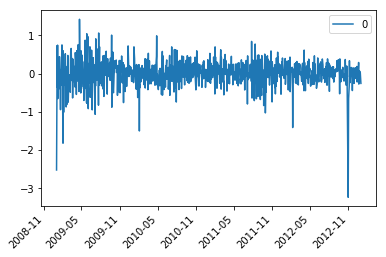

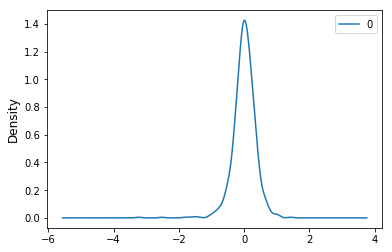

                 0
count  1006.000000
mean      0.002481
std       0.348467
min      -3.239063
25%      -0.166636
50%       0.014269
75%       0.201277
max       1.425218
69.04040467389218


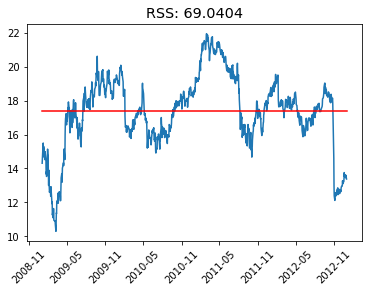

0 0 0
38.4488746341483


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


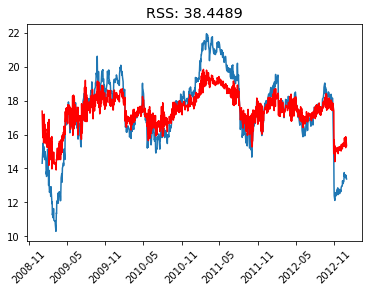

0 0 1
26.310815914142974


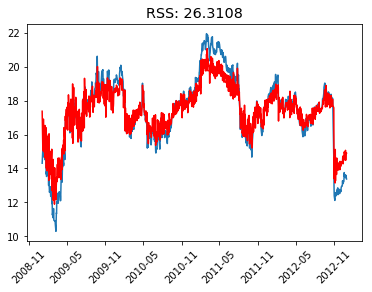

0 0 2


/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

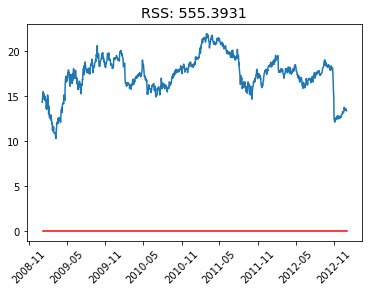

0 1 0


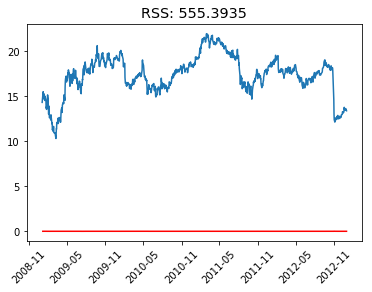

0 1 1


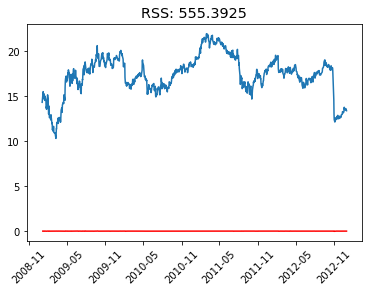

0 1 2


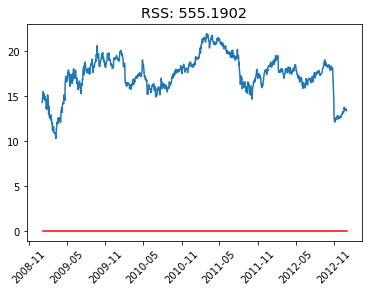

0 2 0


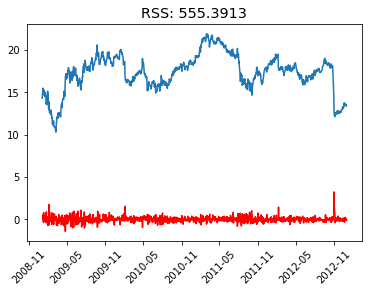

0 2 1


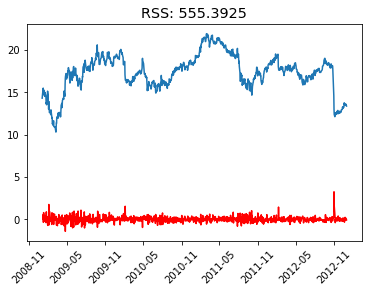

0 2 2
11.047277404204305


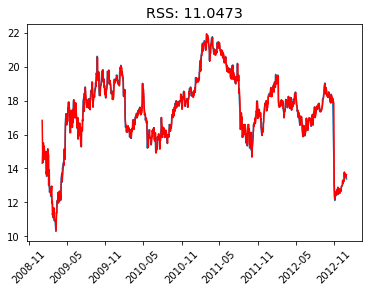

1 0 0


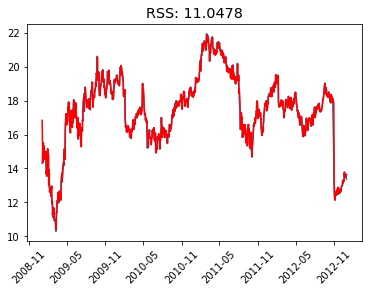

1 0 1


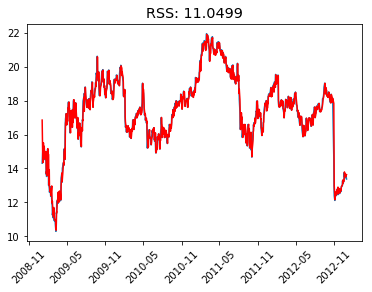

1 0 2


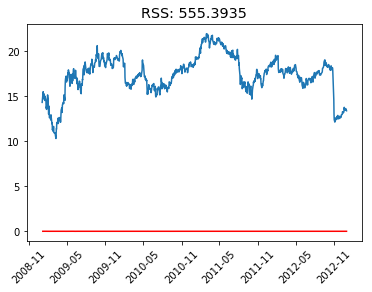

1 1 0


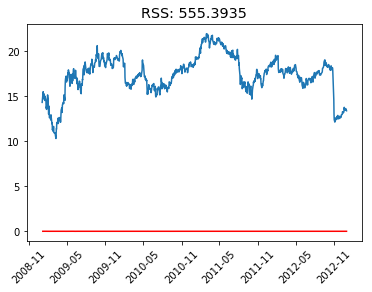

1 1 1


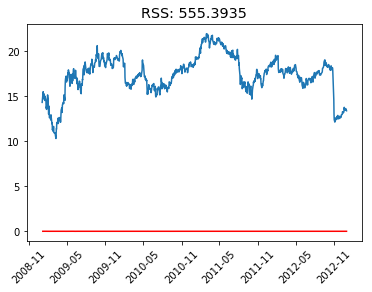

1 1 2


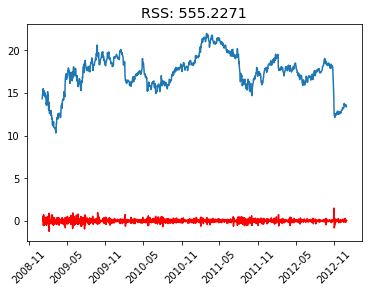

1 2 0


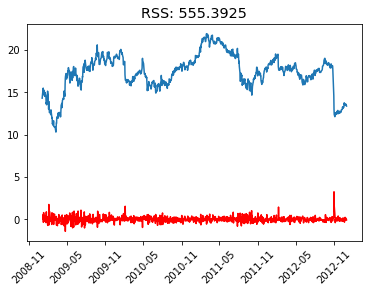

1 2 1


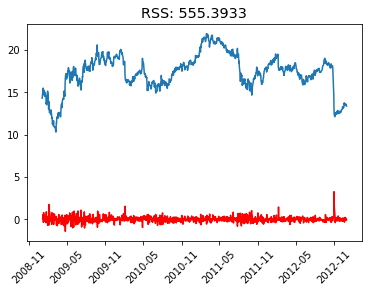

1 2 2


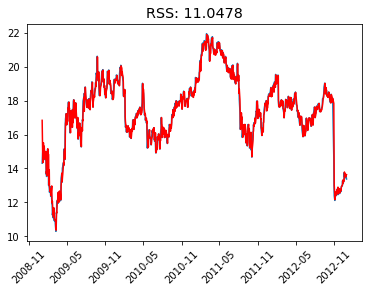

2 0 0


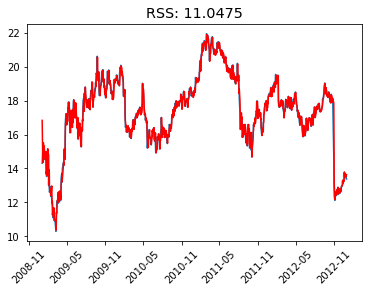

2 0 1


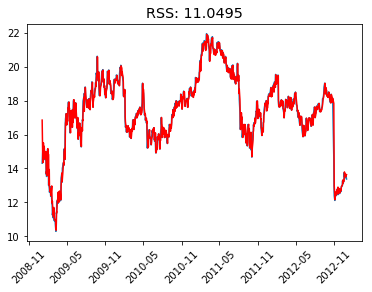

2 0 2


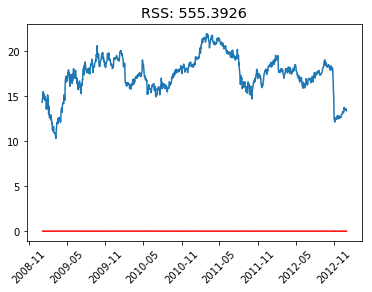

2 1 0


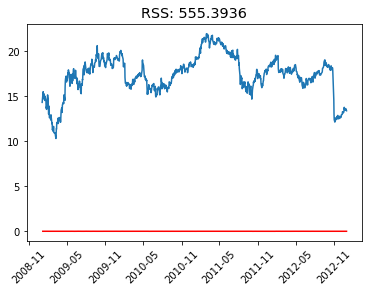

2 1 1


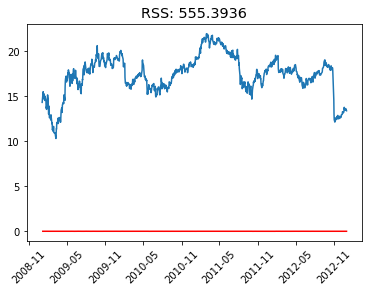

2 1 2


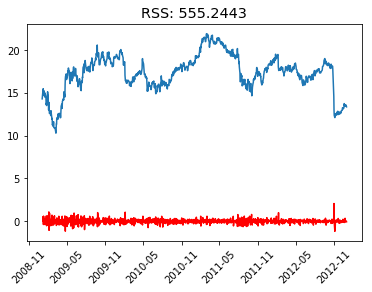

2 2 0


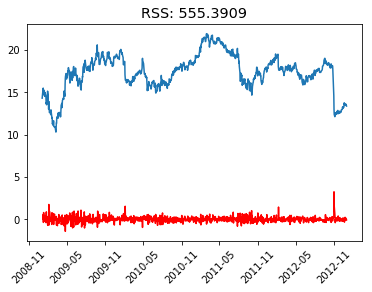

2 2 1


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


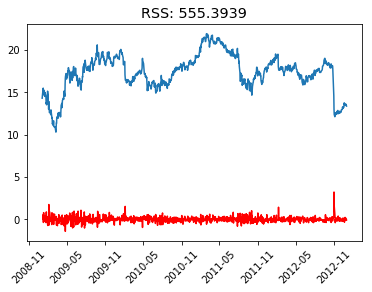

2 2 2


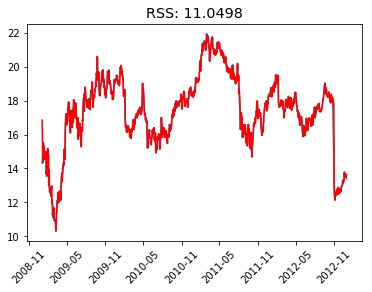

3 0 0


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


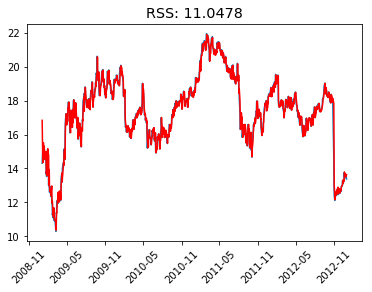

3 0 1


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


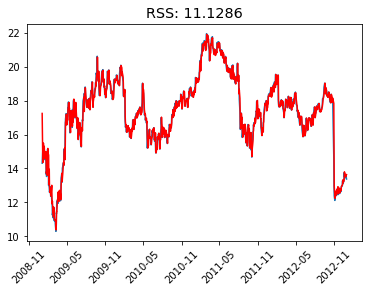

3 0 2


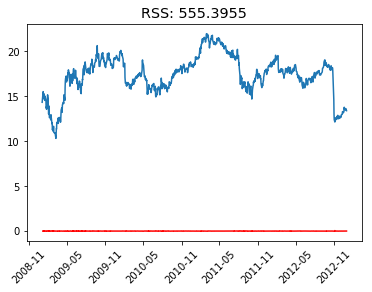

3 1 0


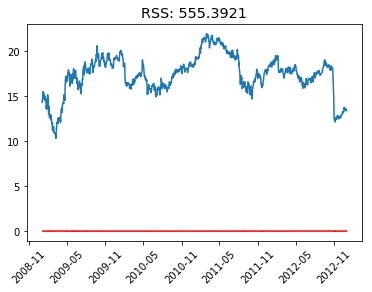

3 1 1


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


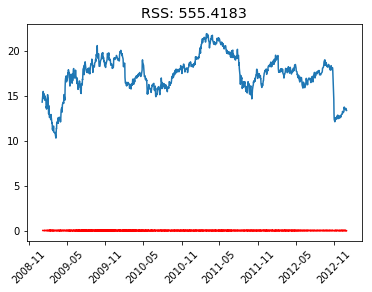

3 1 2


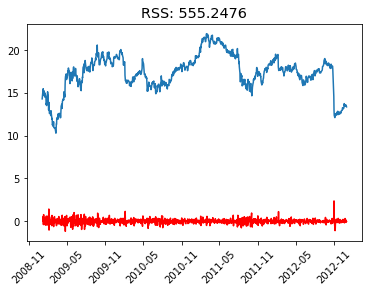

3 2 0


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


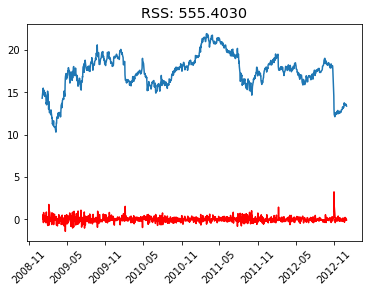

3 2 1


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


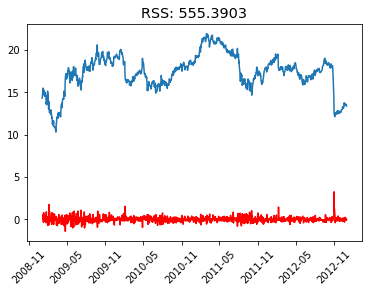

3 2 2


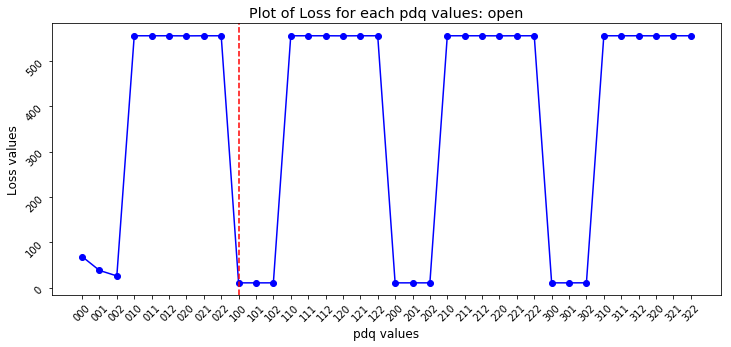

Best p,d,q value:  [1, 0, 0] , Best Loss Value:  11.047277404204305
Guessed p,d,q value:  100 , Loss at guessed values:  11.047277404204305


In [25]:
# initilize with the guessed values of p, d, q parameters
p=1
d=0
q=0
guessed_int = str(p)+str(d)+str(q)
fitArima(wu_df.open, p, d, q)
brute_dict = run_bruteForce(wu_df.open, label="open")
print("Best p,d,q value: ", brute_dict['best_ints'], ", Best Loss Value: ", brute_dict['loss_best'])
print("Guessed p,d,q value: ", guessed_int, ", Loss at guessed values: ", 
      brute_dict['loss_values'][brute_dict['pdq_values'].index(guessed_int)])

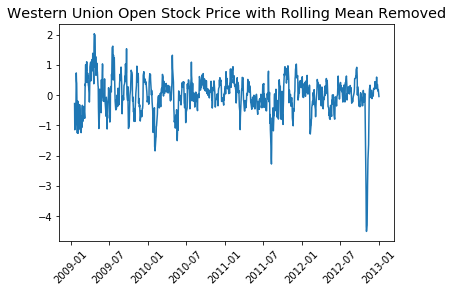

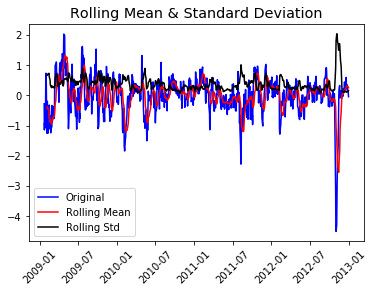

Results of Dickey-Fuller Test:
Test Statistic                -6.455088e+00
p-value                        1.490288e-08
#Lags Used                     1.100000e+01
Number of Observations Used    9.830000e+02
Critical Value (1%)           -3.437020e+00
Critical Value (5%)           -2.864485e+00
Critical Value (10%)          -2.568338e+00
dtype: float64


In [26]:
moving_avg = wu_df.open.rolling(12).mean()
open_no_trend = wu_df.open - moving_avg
open_no_trend.dropna(inplace=True)
plt.plot(open_no_trend)
plt.title("Western Union Open Stock Price with Rolling Mean Removed")
plt.xticks(rotation=45)
plt.show()
open_no_trend.index = pd.to_datetime(open_no_trend.index)
test_stationarity(open_no_trend.dropna())

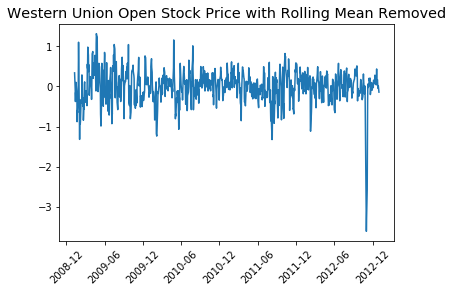

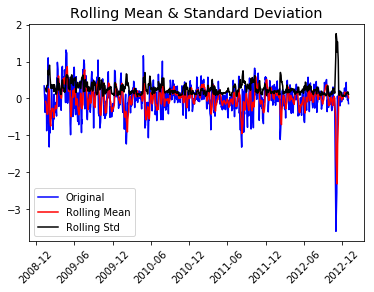

Results of Dickey-Fuller Test:
Test Statistic                -1.028766e+01
p-value                        3.639041e-18
#Lags Used                     5.000000e+00
Number of Observations Used    9.950000e+02
Critical Value (1%)           -3.436939e+00
Critical Value (5%)           -2.864449e+00
Critical Value (10%)          -2.568319e+00
dtype: float64


In [27]:
moving_avg = wu_df.open.rolling(6).mean()
open_no_trend = wu_df.open - moving_avg
open_no_trend.dropna(inplace=True)
plt.plot(open_no_trend)
plt.title("Western Union Open Stock Price with Rolling Mean Removed")
plt.xticks(rotation=45)
plt.show()
open_no_trend.index = pd.to_datetime(open_no_trend.index)
test_stationarity(open_no_trend, seasonPeriod=6)

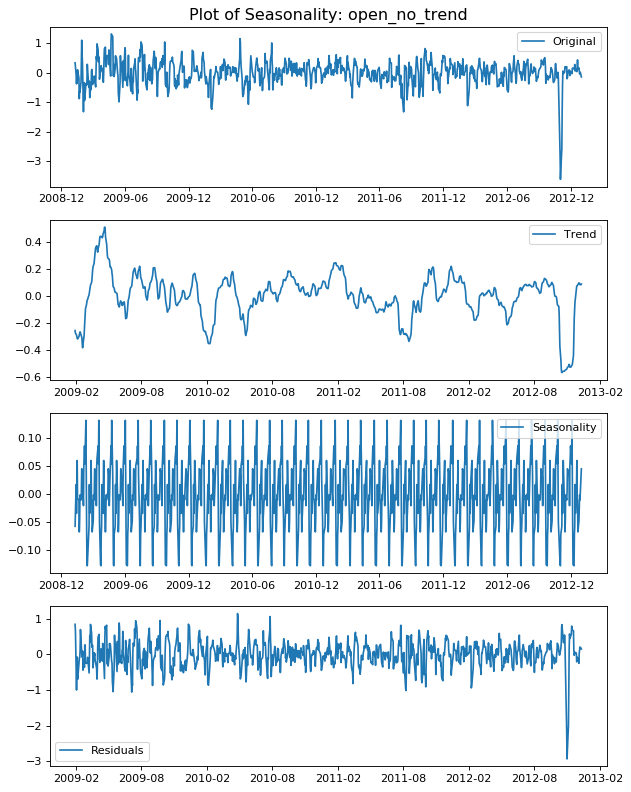

In [28]:
plot_seasonality(open_no_trend, freq=26, label='open_no_trend')

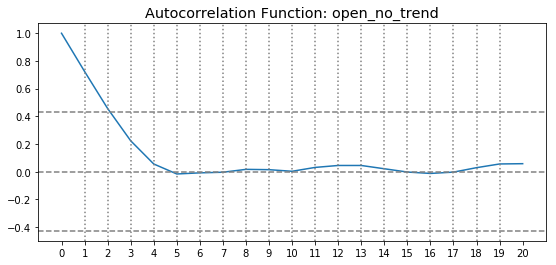

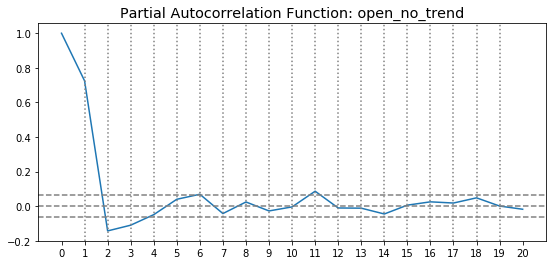

In [29]:
plot_autocorrelation(open_no_trend, 'open_no_trend')
plot_partial_autocorrelation(open_no_trend, 'open_no_trend')

                              ARMA Model Results                              
Dep. Variable:                   open   No. Observations:                 1001
Model:                     ARMA(1, 1)   Log Likelihood                -165.377
Method:                       css-mle   S.D. of innovations              0.285
Date:                Mon, 22 Oct 2018   AIC                            338.754
Time:                        19:23:01   BIC                            358.389
Sample:                    01-09-2009   HQIC                           346.217
                         - 12-31-2012                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0033      0.030     -0.109      0.913      -0.062       0.055
ar.L1.open     0.6540      0.031     21.151      0.000       0.593       0.715
ma.L1.open     0.1524      0.038      4.032      0.0

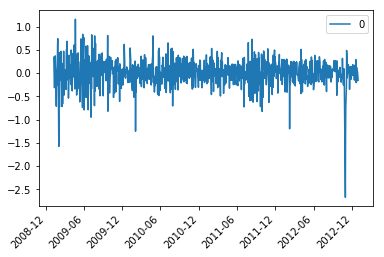

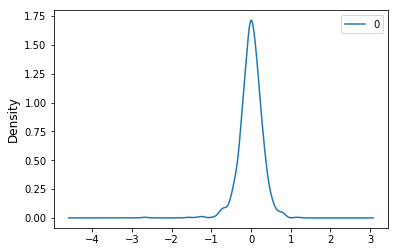

                 0
count  1001.000000
mean     -0.000216
std       0.285582
min      -2.672356
25%      -0.146667
50%       0.005560
75%       0.161652
max       1.158529
13.20018360930438


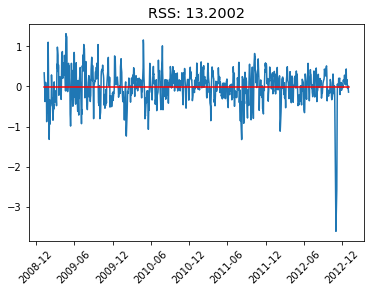

0 0 0
10.169560229074843


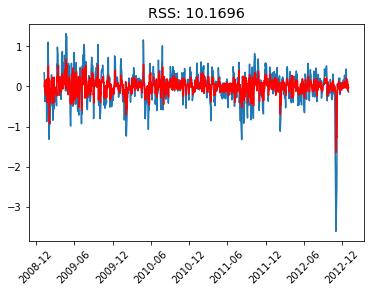

0 0 1
9.356150575447717


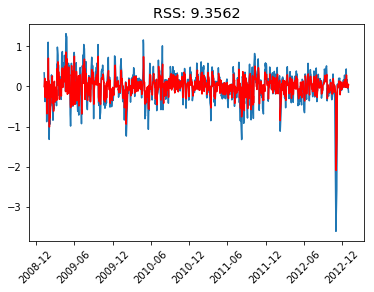

0 0 2


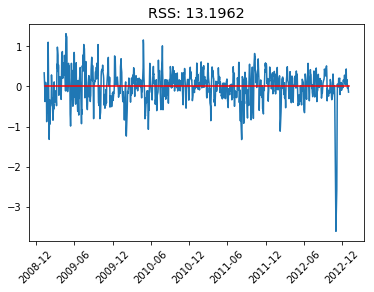

0 1 0


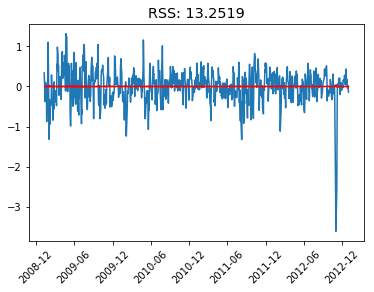

0 1 1


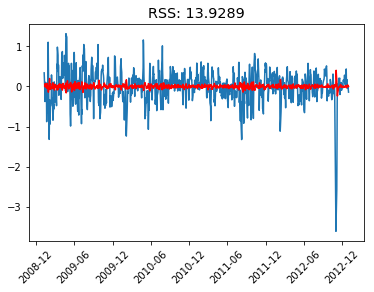

0 1 2


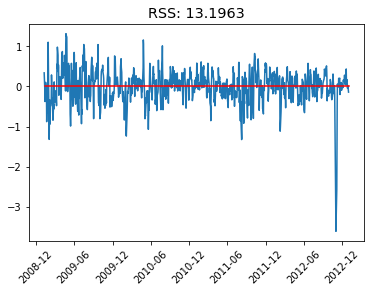

0 2 0


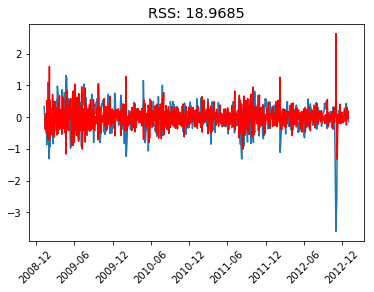

0 2 1


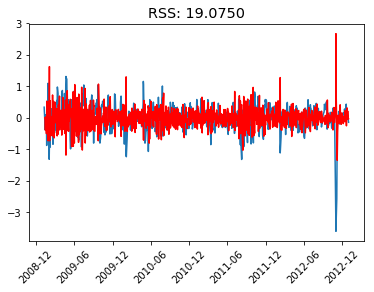

0 2 2
9.10330409976782


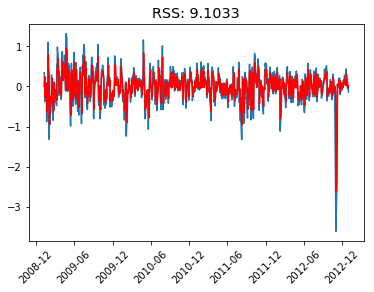

1 0 0
9.030913726628325


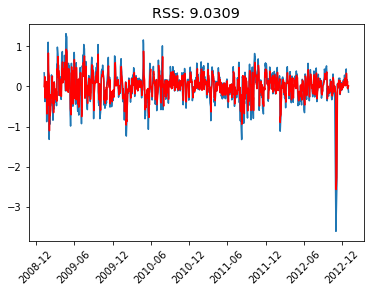

1 0 1
8.986009899789881


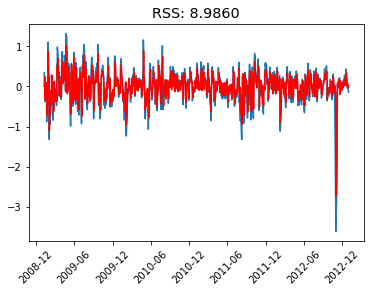

1 0 2


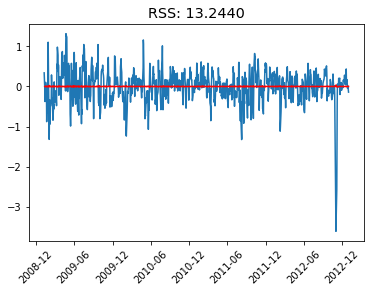

1 1 0


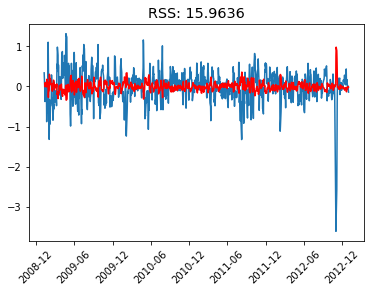

1 1 1


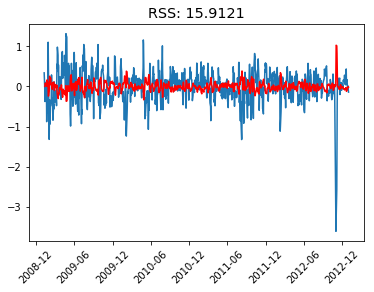

1 1 2


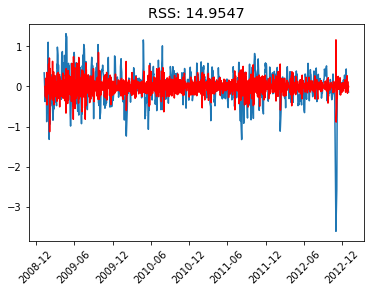

1 2 0


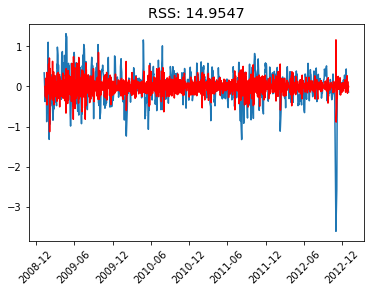

1 2 1


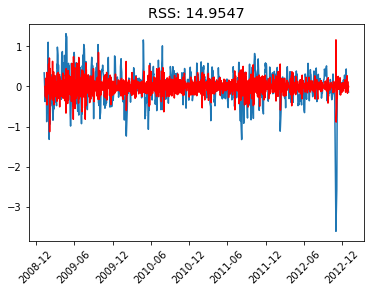

1 2 2


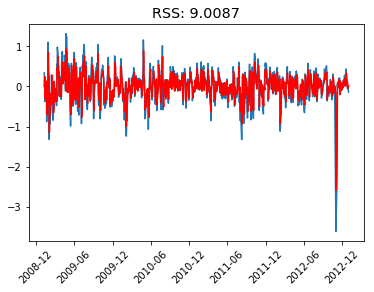

2 0 0
8.961748901477574


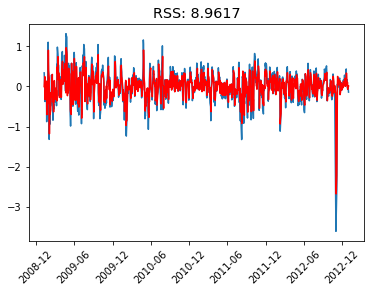

2 0 1
8.942131826999384


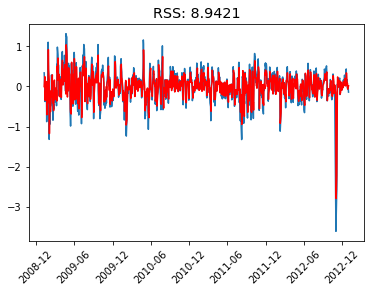

2 0 2


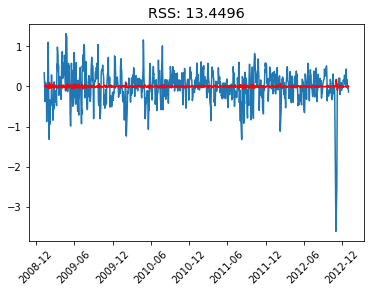

2 1 0


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


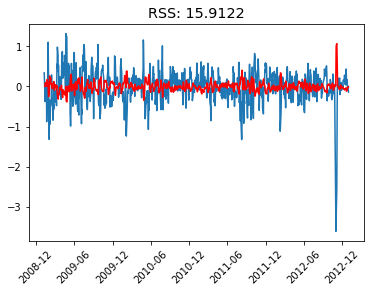

2 1 1


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


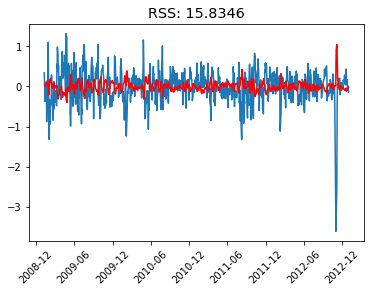

2 1 2


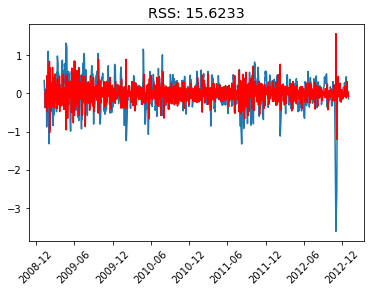

2 2 0


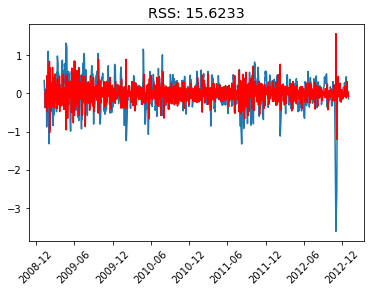

2 2 1


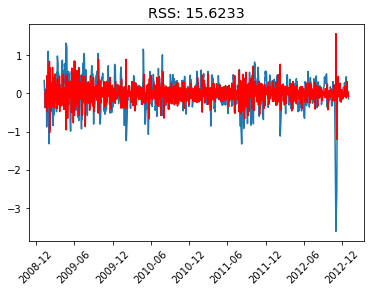

2 2 2


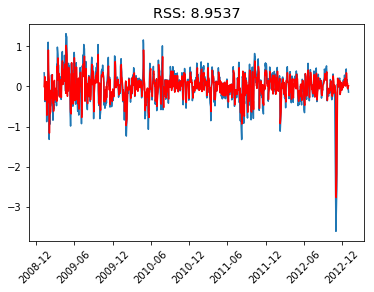

3 0 0


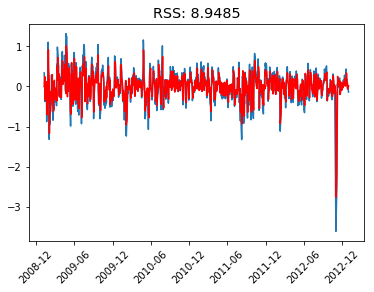

3 0 1
8.919406160270615


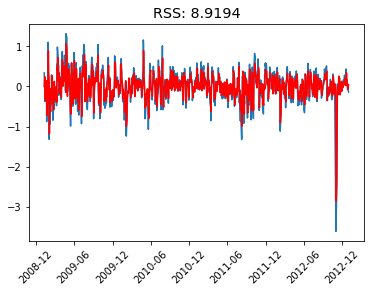

3 0 2


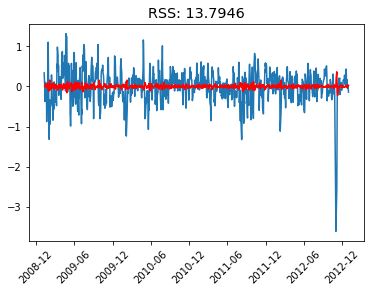

3 1 0


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


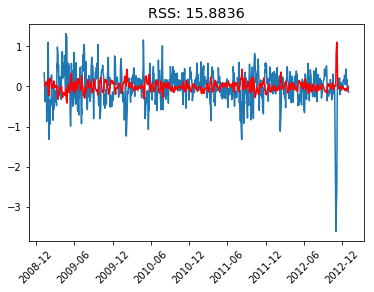

3 1 1


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


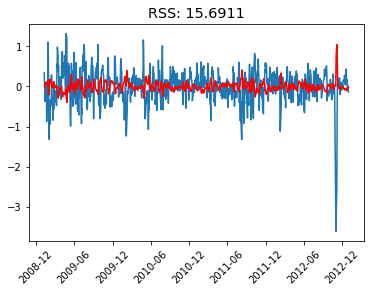

3 1 2


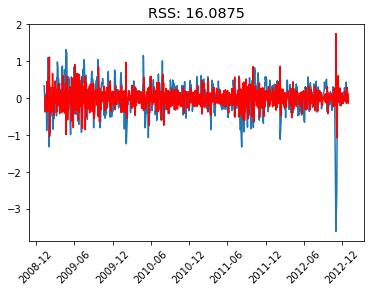

3 2 0


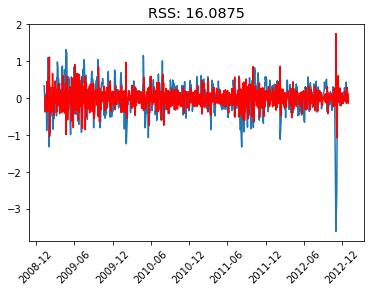

3 2 1


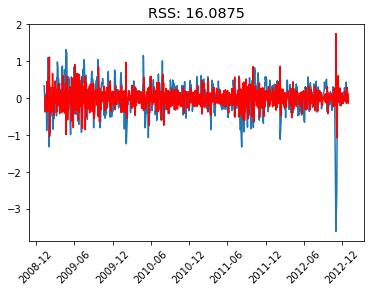

3 2 2


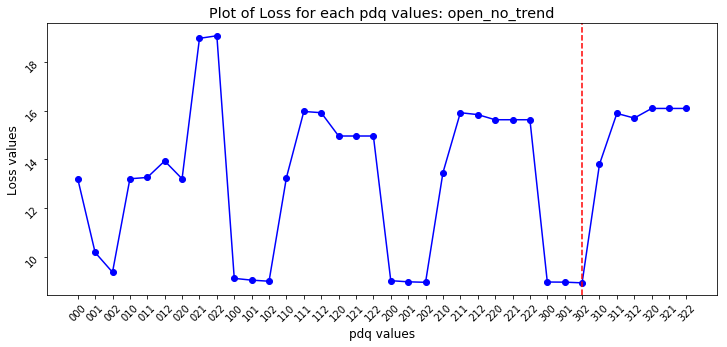

Best p,d,q value:  [3, 0, 2] , Best Loss Value:  8.919406160270615
Guessed p,d,q value:  101 , Loss at guessed values:  9.030913726628325


In [30]:
# initilize with the guessed values of p, d, q parameters
p=1
d=0
q=1
guessed_int = str(p)+str(d)+str(q)
fitArima(open_no_trend, p, d, q)
brute_dict = run_bruteForce(open_no_trend, label="open_no_trend")
print("Best p,d,q value: ", brute_dict['best_ints'], ", Best Loss Value: ", brute_dict['loss_best'])
print("Guessed p,d,q value: ", guessed_int, ", Loss at guessed values: ", 
      brute_dict['loss_values'][brute_dict['pdq_values'].index(guessed_int)])

In [43]:
print("Simplest efficient p,d,q value from graph: ", '102', ", Loss for simplest accurate model: ", 
      brute_dict['loss_values'][brute_dict['pdq_values'].index('102')])

Simplest efficient p,d,q value from graph:  102 , Loss for simplest accurate model:  8.991325560054348


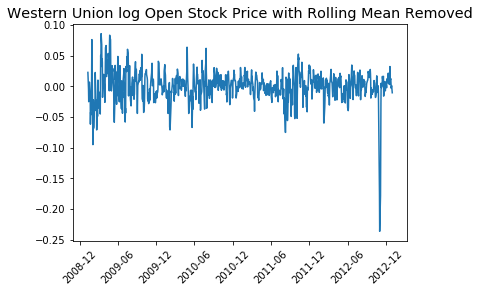

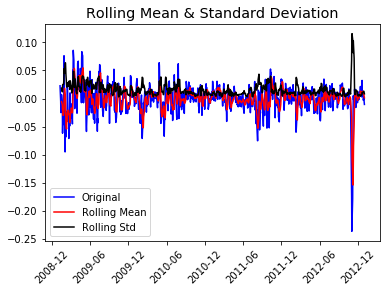

Results of Dickey-Fuller Test:
Test Statistic                -1.006088e+01
p-value                        1.334535e-17
#Lags Used                     5.000000e+00
Number of Observations Used    9.950000e+02
Critical Value (1%)           -3.436939e+00
Critical Value (5%)           -2.864449e+00
Critical Value (10%)          -2.568319e+00
dtype: float64


In [39]:
log_open=np.log(wu_df.open)
log_moving_avg = log_open.rolling(6).mean()
log_open_no_trend=log_open - log_moving_avg
log_open_no_trend.dropna(inplace=True)
plt.plot(log_open_no_trend)
plt.title("Western Union log Open Stock Price with Rolling Mean Removed")
plt.xticks(rotation=45)
plt.show()
log_open_no_trend.index = pd.to_datetime(log_open_no_trend.index)
test_stationarity(log_open_no_trend, seasonPeriod=6)

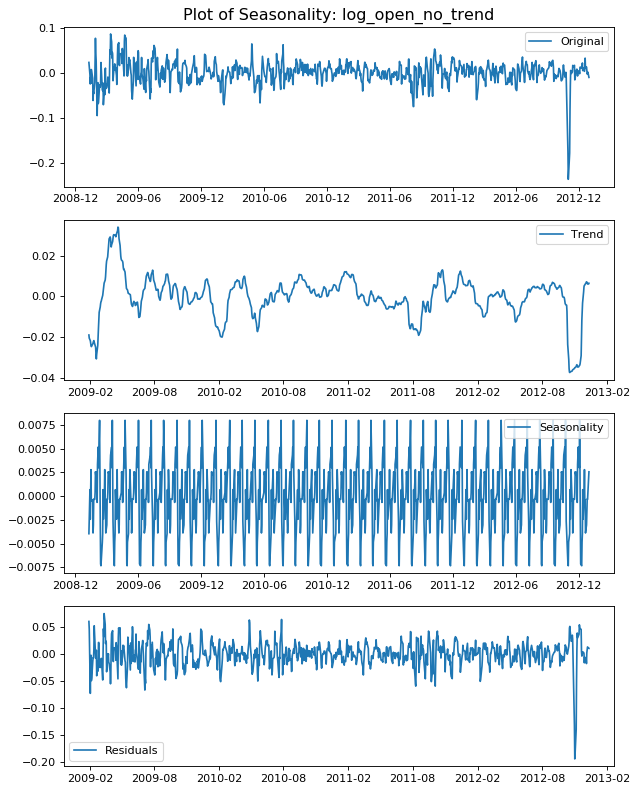

In [40]:
plot_seasonality(log_open_no_trend, freq=26, label='log_open_no_trend')

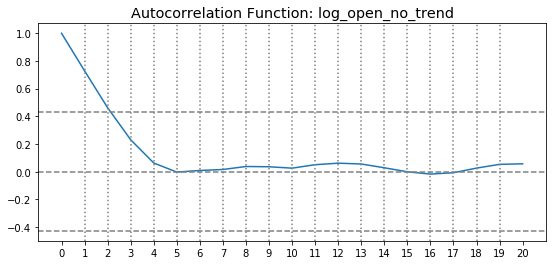

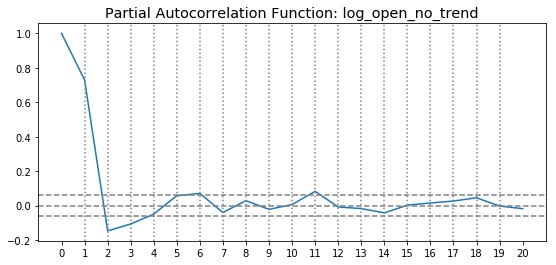

In [41]:
plot_autocorrelation(log_open_no_trend, 'log_open_no_trend')
plot_partial_autocorrelation(log_open_no_trend, 'log_open_no_trend')

                              ARMA Model Results                              
Dep. Variable:                   open   No. Observations:                 1001
Model:                     ARMA(1, 0)   Log Likelihood                2621.135
Method:                       css-mle   S.D. of innovations              0.018
Date:                Mon, 22 Oct 2018   AIC                          -5236.270
Time:                        19:31:08   BIC                          -5221.544
Sample:                    01-09-2009   HQIC                         -5230.674
                         - 12-31-2012                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.002     -0.112      0.911      -0.004       0.004
ar.L1.open     0.7284      0.022     33.691      0.000       0.686       0.771
                                    Roots           

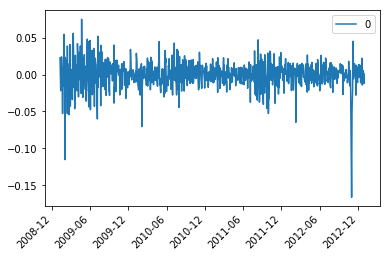

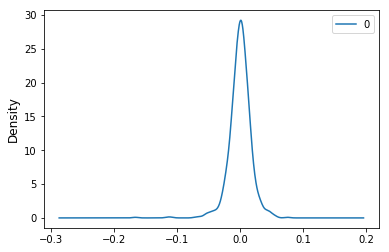

                 0
count  1001.000000
mean     -0.000017
std       0.017652
min      -0.166414
25%      -0.008173
50%       0.000790
75%       0.009638
max       0.075130
0.8148064617187945


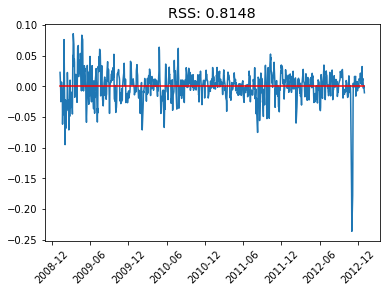

0 0 0
0.6246468132715912


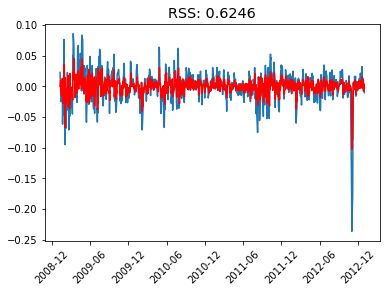

0 0 1
0.5749055110998491


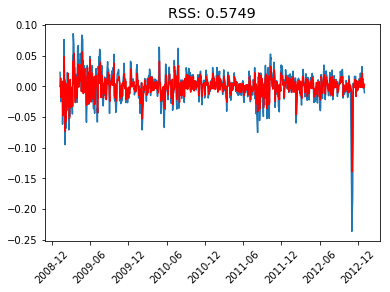

0 0 2


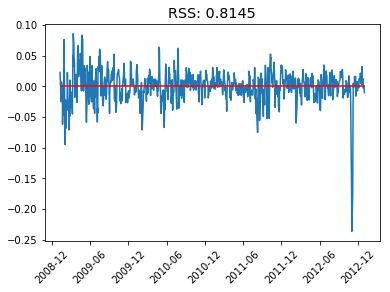

0 1 0


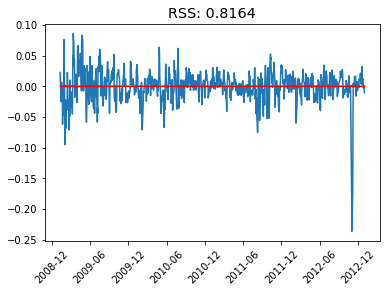

0 1 1


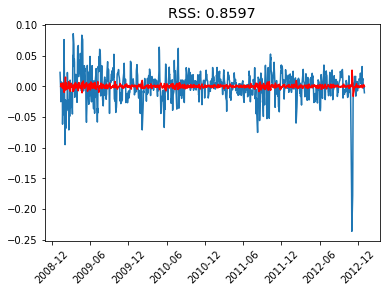

0 1 2


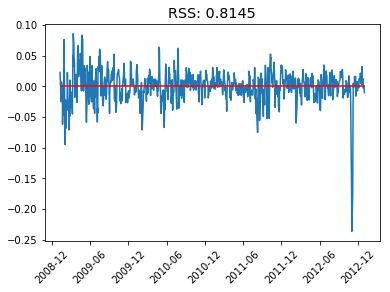

0 2 0


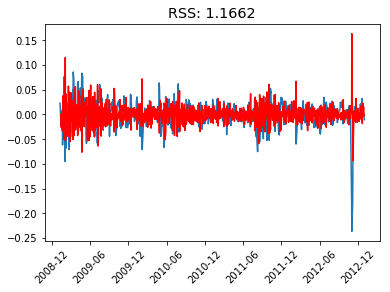

0 2 1


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


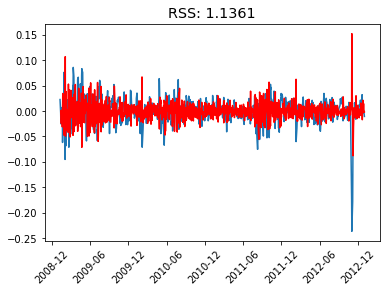

0 2 2
0.5582168703478716


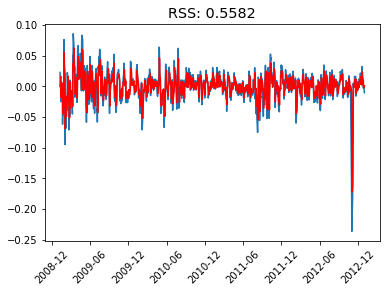

1 0 0
0.5535005796152221


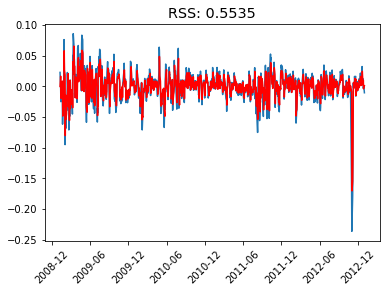

1 0 1
0.550879013502943


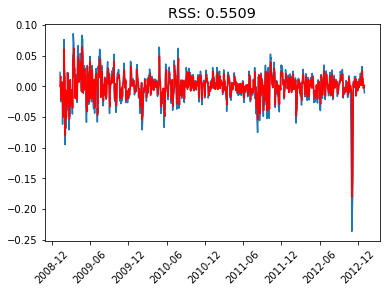

1 0 2


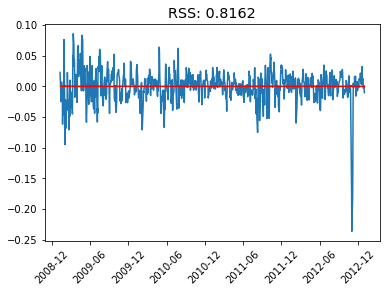

1 1 0


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


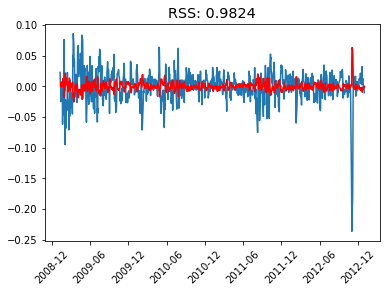

1 1 1


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


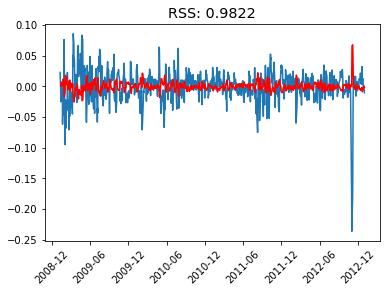

1 1 2


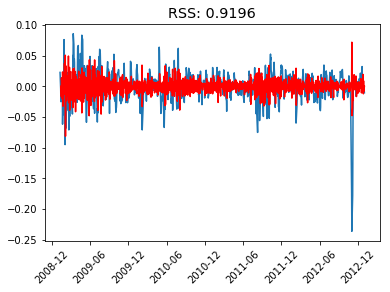

1 2 0


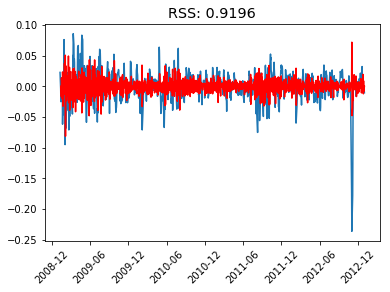

1 2 1


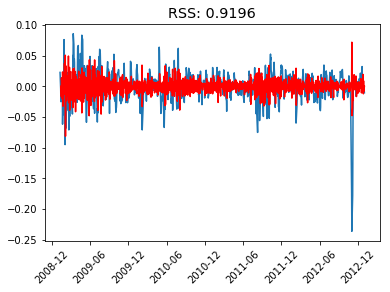

1 2 2


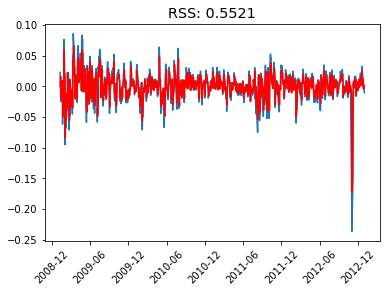

2 0 0
0.5494843478197835


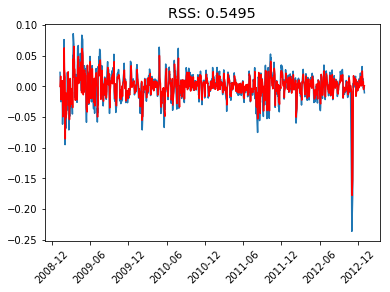

2 0 1
0.5481956387461974


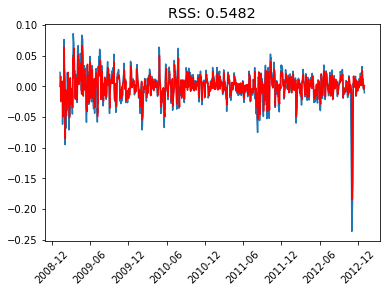

2 0 2


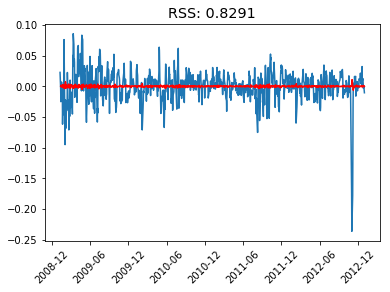

2 1 0


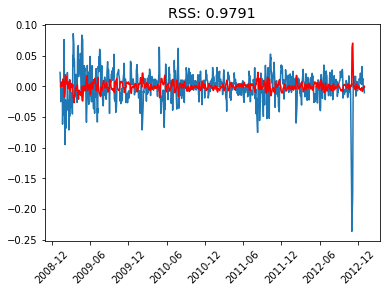

2 1 1


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


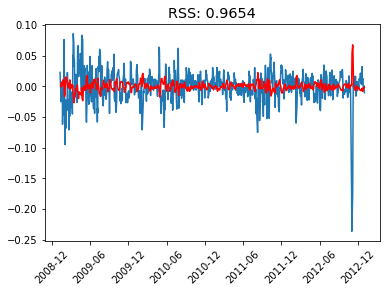

2 1 2


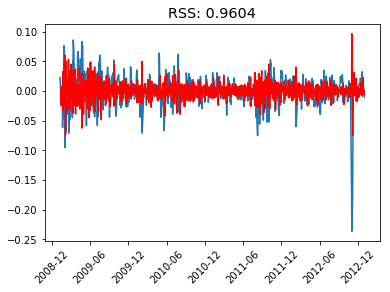

2 2 0


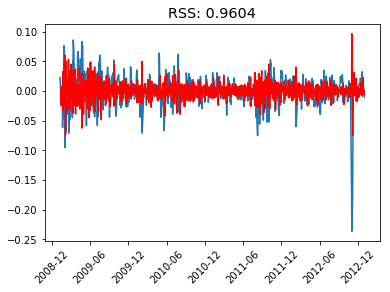

2 2 1


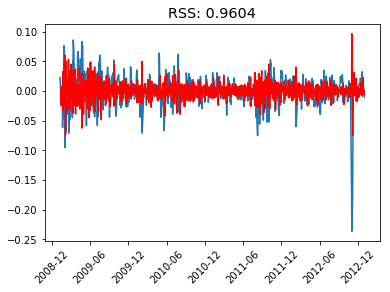

2 2 2


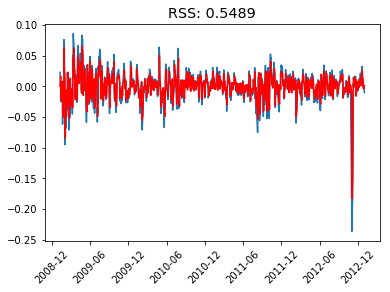

3 0 0


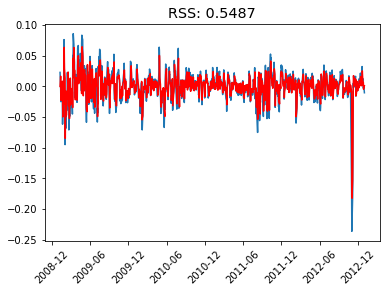

3 0 1
0.5463199773724263


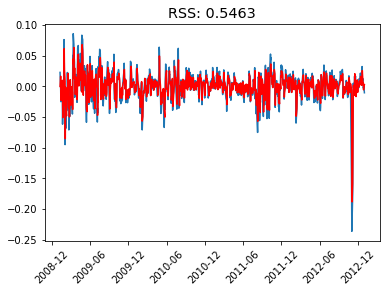

3 0 2


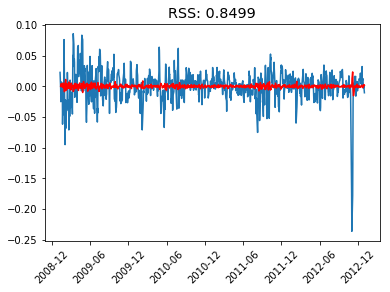

3 1 0


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


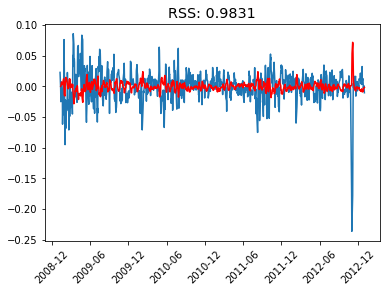

3 1 1


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


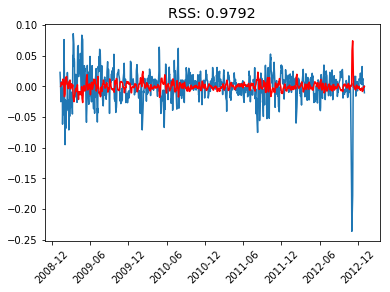

3 1 2


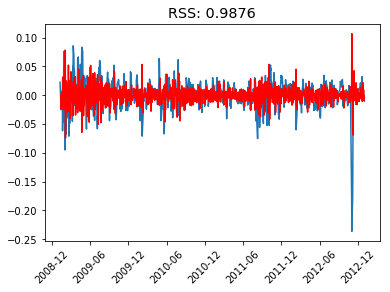

3 2 0


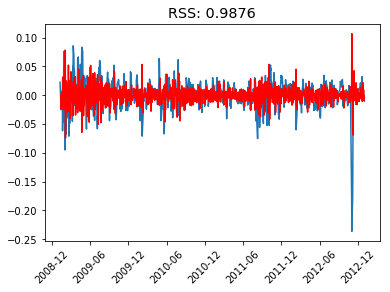

3 2 1


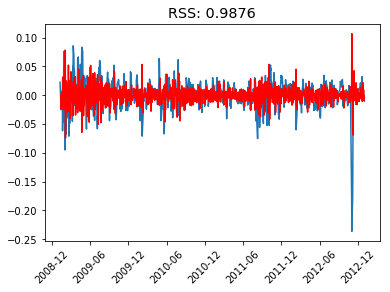

3 2 2


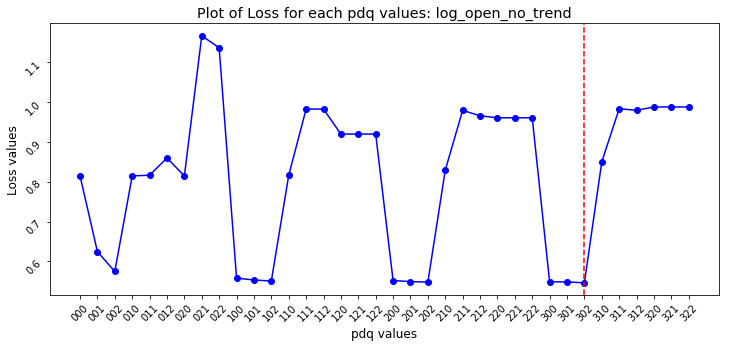

Best p,d,q value:  [3, 0, 2] , Best Loss Value:  0.5463199773724263
Guessed p,d,q value:  100 , Loss at guessed values:  0.5582168703478716


In [47]:
# initilize with the guessed values of p, d, q parameters
p=1
d=0
q=0
guessed_int = str(p)+str(d)+str(q)
fitArima(log_open_no_trend, p, d, q)
brute_dict = run_bruteForce(log_open_no_trend, label='log_open_no_trend')
print("Best p,d,q value: ", brute_dict['best_ints'], ", Best Loss Value: ", brute_dict['loss_best'])
print("Guessed p,d,q value: ", guessed_int, ", Loss at guessed values: ", 
      brute_dict['loss_values'][brute_dict['pdq_values'].index(guessed_int)])

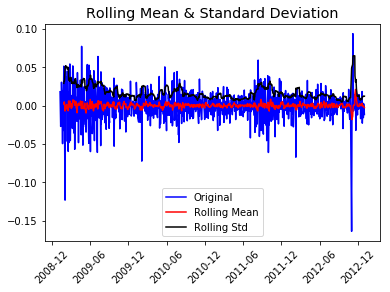

Results of Dickey-Fuller Test:
Test Statistic                -1.271844e+01
p-value                        9.946967e-24
#Lags Used                     1.600000e+01
Number of Observations Used    9.840000e+02
Critical Value (1%)           -3.437013e+00
Critical Value (5%)           -2.864482e+00
Critical Value (10%)          -2.568336e+00
dtype: float64


In [48]:
diff_log_open = log_open-log_open.shift()
diff_log_open[0] = 0
log_moving_avg = diff_log_open.rolling(6).mean()
diff_log_open=(diff_log_open - log_moving_avg).dropna()
diff_log_open.index = pd.to_datetime(diff_log_open.index)
test_stationarity(diff_log_open)

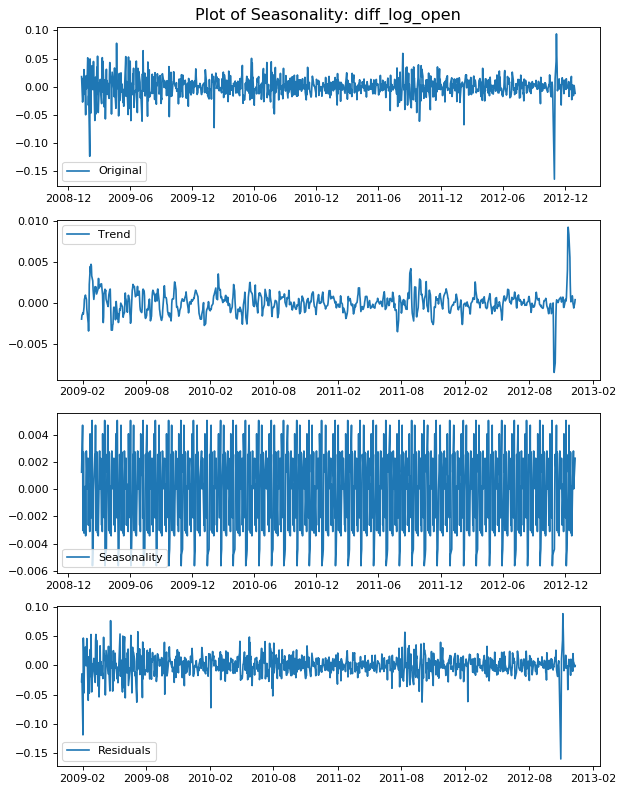

In [49]:
plot_seasonality(diff_log_open, freq=26, label='diff_log_open')

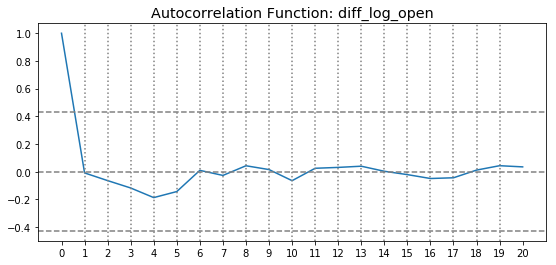

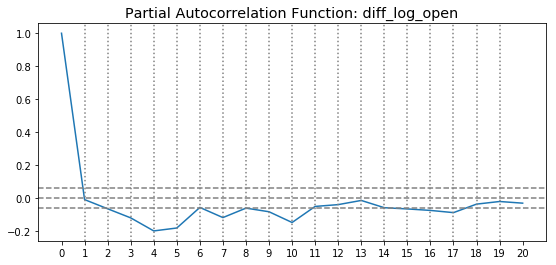

In [50]:
plot_autocorrelation(diff_log_open, 'diff_log_open')
plot_partial_autocorrelation(diff_log_open, 'diff_log_open')

                              ARMA Model Results                              
Dep. Variable:                   open   No. Observations:                 1001
Model:                     ARMA(1, 1)   Log Likelihood                2619.113
Method:                       css-mle   S.D. of innovations              0.018
Date:                Mon, 22 Oct 2018   AIC                          -5230.225
Time:                        19:33:04   BIC                          -5210.590
Sample:                    01-09-2009   HQIC                         -5222.763
                         - 12-31-2012                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.938e-06   7.04e-06     -0.844      0.399   -1.97e-05    7.86e-06
ar.L1.open     0.7285      0.022     33.540      0.000       0.686       0.771
ma.L1.open    -1.0000      0.003   -383.734      0.0

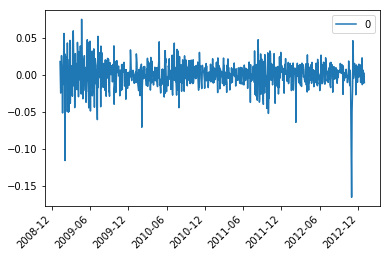

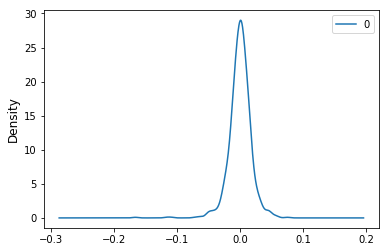

                 0
count  1001.000000
mean      0.000207
std       0.017731
min      -0.165821
25%      -0.008150
50%       0.001055
75%       0.009853
max       0.075297
0.6002750201936352


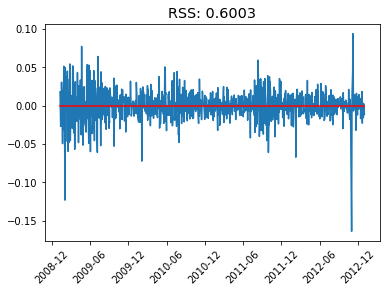

0 0 0
0.6002478513678053


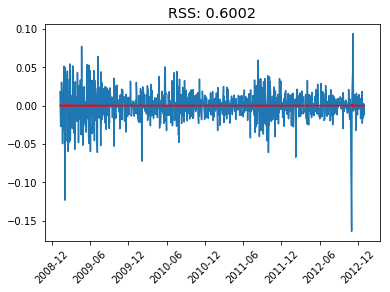

0 0 1
0.5975790435715294


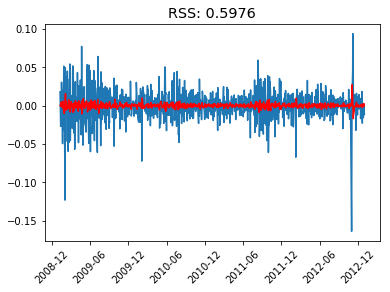

0 0 2


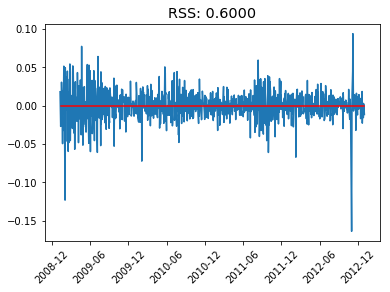

0 1 0


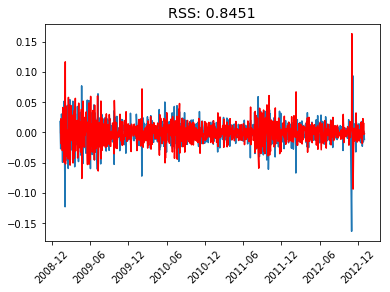

0 1 1


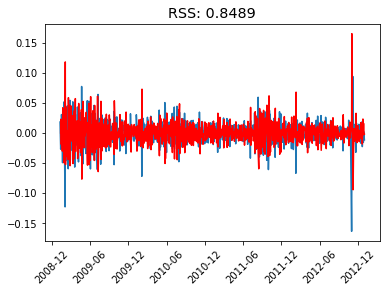

0 1 2


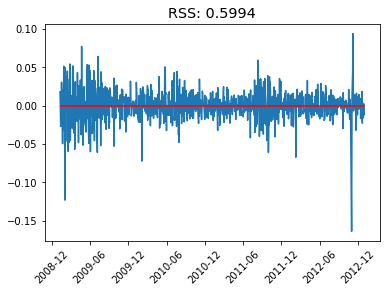

0 2 0


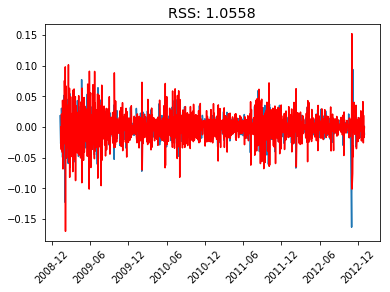

0 2 1


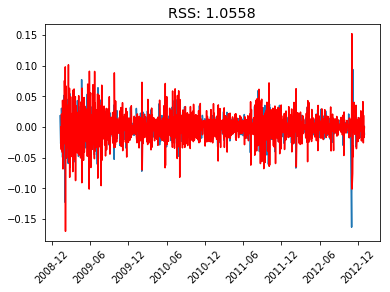

0 2 2


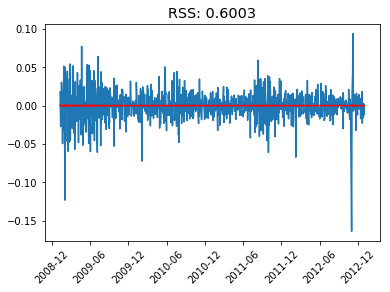

1 0 0
0.560747197989398


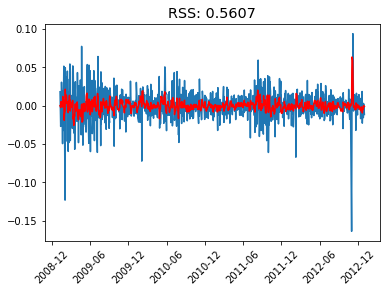

1 0 1


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0.5574643697011116


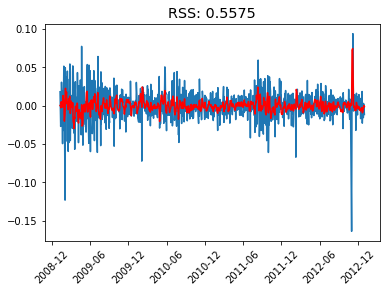

1 0 2


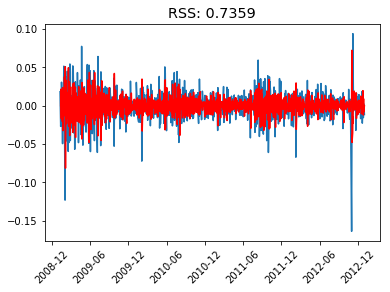

1 1 0


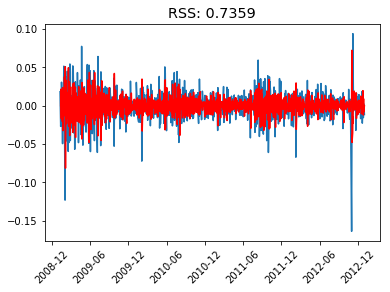

1 1 1


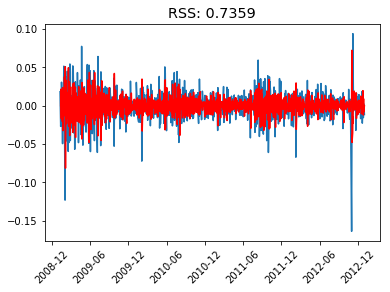

1 1 2


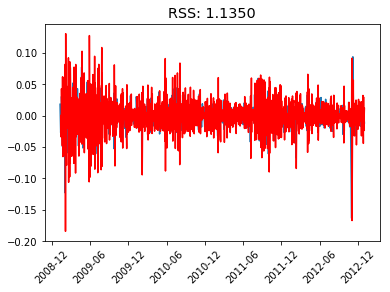

1 2 0


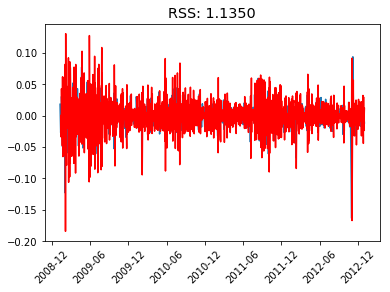

1 2 1


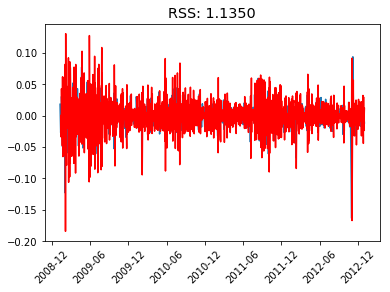

1 2 2


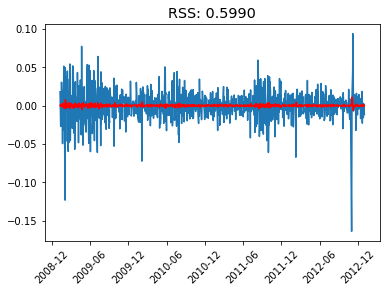

2 0 0


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0.557050614170126


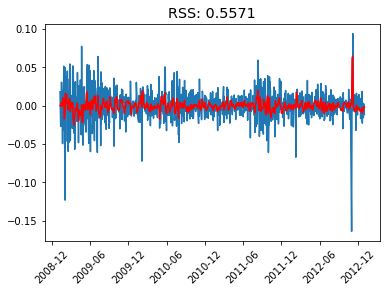

2 0 1


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


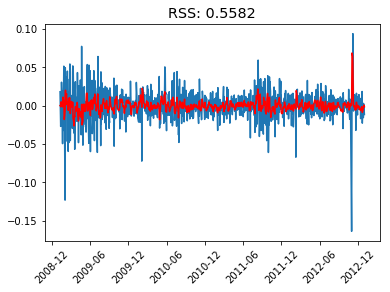

2 0 2


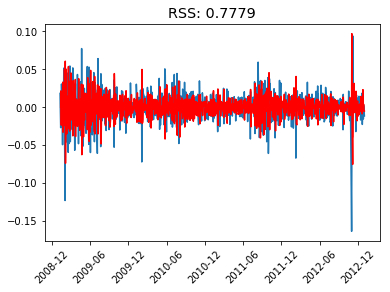

2 1 0


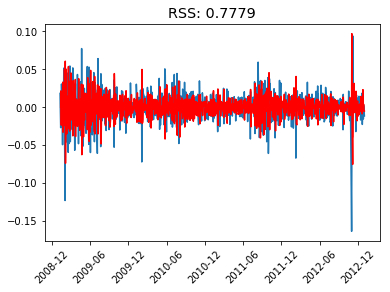

2 1 1


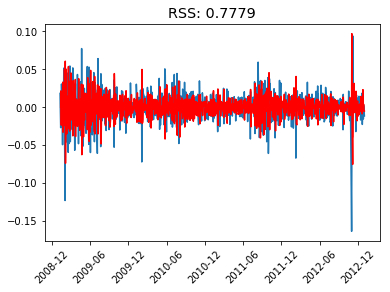

2 1 2


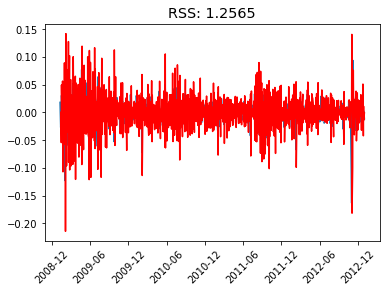

2 2 0


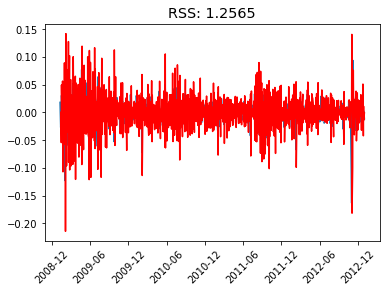

2 2 1


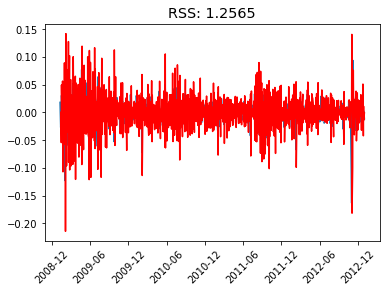

2 2 2


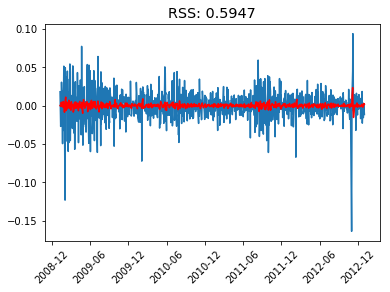

3 0 0


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0.552285857071832


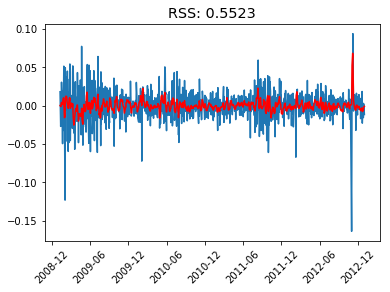

3 0 1


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


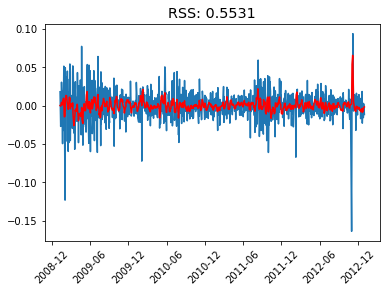

3 0 2


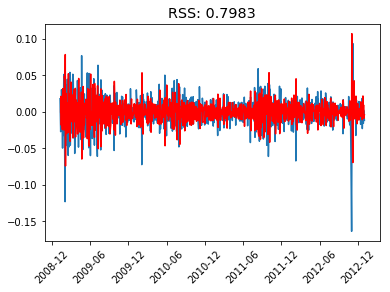

3 1 0


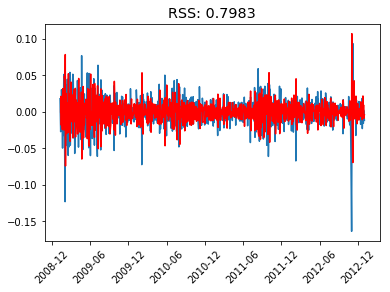

3 1 1


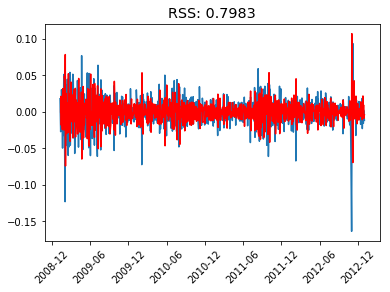

3 1 2


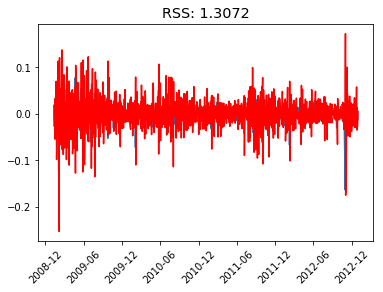

3 2 0


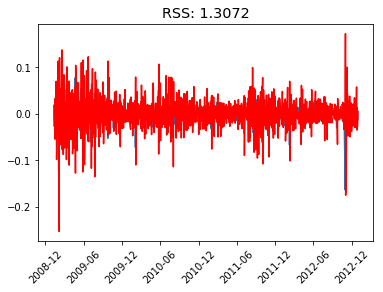

3 2 1


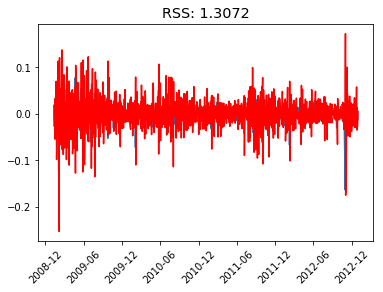

3 2 2


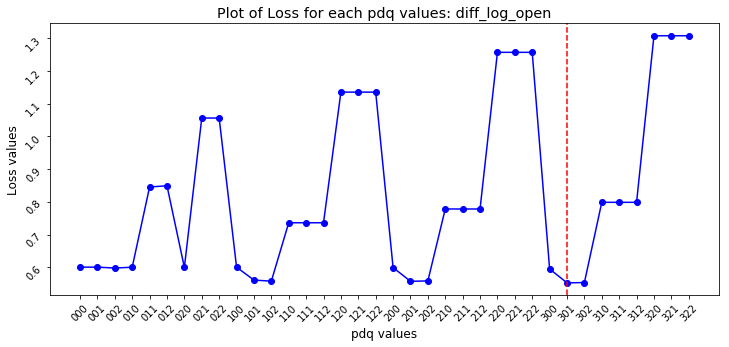

Best p,d,q value:  [3, 0, 1] , Best Loss Value:  0.552285857071832
Guessed p,d,q value:  101 , Loss at guessed values:  0.560747197989398


In [52]:
# initilize with the guessed values of p, d, q parameters
p=1
d=0
q=1
guessed_int = str(p)+str(d)+str(q)
fitArima(diff_log_open, p, d, q)
brute_dict = run_bruteForce(diff_log_open, label='diff_log_open')
print("Best p,d,q value: ", brute_dict['best_ints'], ", Best Loss Value: ", brute_dict['loss_best'])
print("Guessed p,d,q value: ", guessed_int, ", Loss at guessed values: ", 
      brute_dict['loss_values'][brute_dict['pdq_values'].index(guessed_int)])

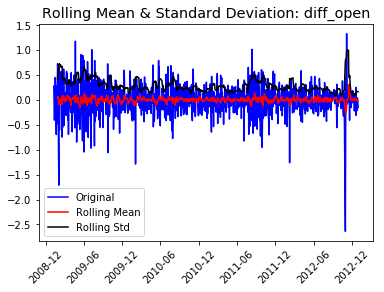

Results of Dickey-Fuller Test:
Test Statistic                -1.289249e+01
p-value                        4.418437e-24
#Lags Used                     1.600000e+01
Number of Observations Used    9.840000e+02
Critical Value (1%)           -3.437013e+00
Critical Value (5%)           -2.864482e+00
Critical Value (10%)          -2.568336e+00
dtype: float64


In [53]:
diff_open = wu_df.open-wu_df.open.shift()
diff_open[0] = 0
moving_avg = diff_open.rolling(6).mean()
diff_open=(diff_open - moving_avg).dropna()
diff_open.index = pd.to_datetime(diff_open.index)
test_stationarity(diff_open, label='diff_open')

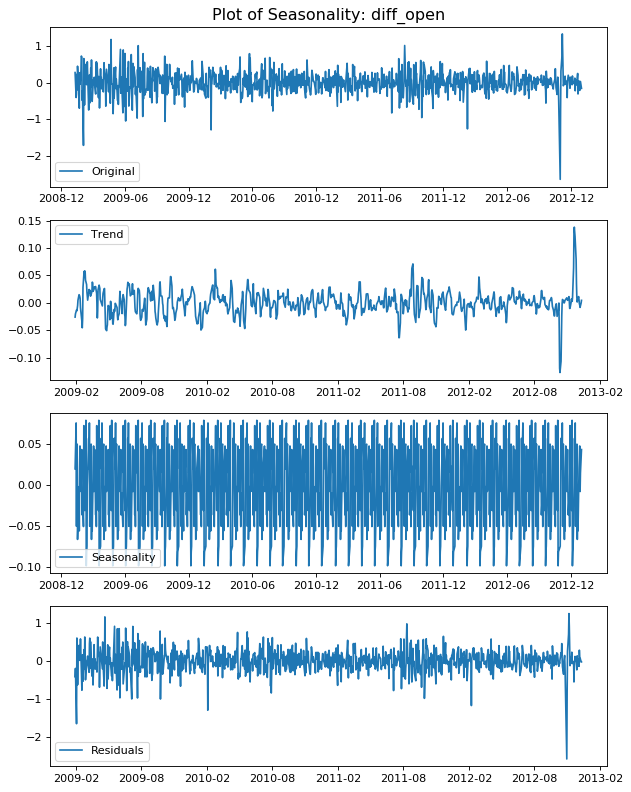

In [54]:
plot_seasonality(diff_open, freq=26, label='diff_open')

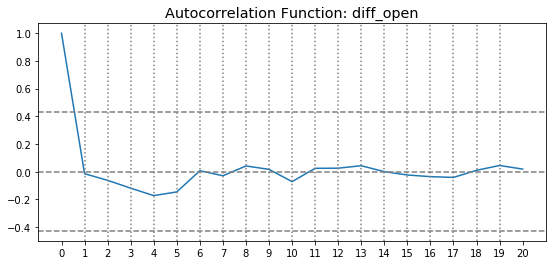

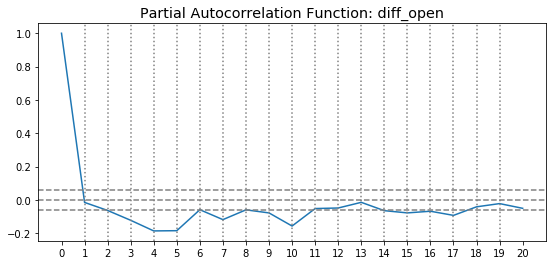

In [55]:
plot_autocorrelation(diff_open, 'diff_open')
plot_partial_autocorrelation(diff_open, 'diff_open')

                              ARMA Model Results                              
Dep. Variable:                   open   No. Observations:                 1001
Model:                     ARMA(1, 1)   Log Likelihood                -175.379
Method:                       css-mle   S.D. of innovations              0.288
Date:                Mon, 22 Oct 2018   AIC                            358.758
Time:                        19:34:23   BIC                            378.393
Sample:                    01-09-2009   HQIC                           366.220
                         - 12-31-2012                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.609e-05      0.000     -0.851      0.395      -0.000       0.000
ar.L1.open     0.7241      0.022     33.117      0.000       0.681       0.767
ma.L1.open    -1.0000      0.003   -383.432      0.0

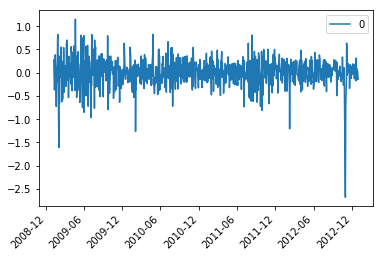

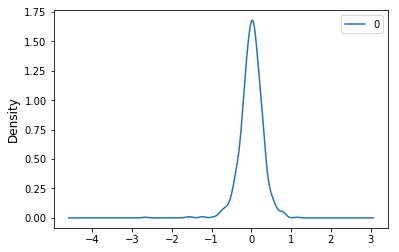

                 0
count  1001.000000
mean      0.002993
std       0.288886
min      -2.680009
25%      -0.143801
50%       0.019288
75%       0.171001
max       1.149496
9.802136514005772


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


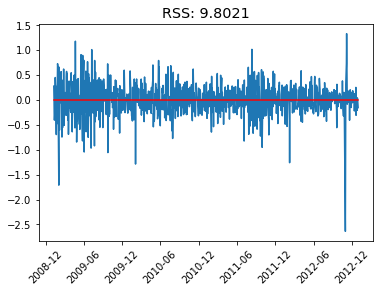

0 0 0
9.800954363026678


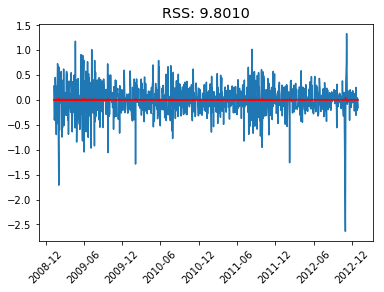

0 0 1
9.759465942190717


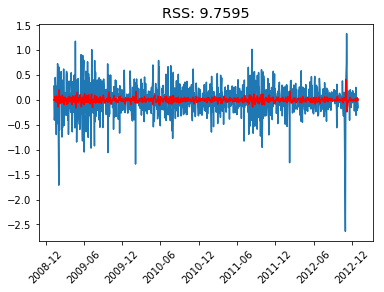

0 0 2


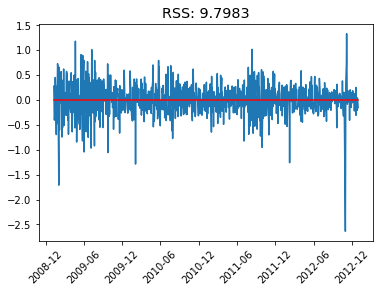

0 1 0


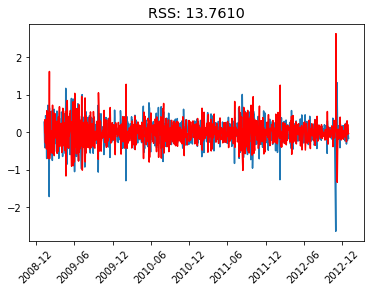

0 1 1


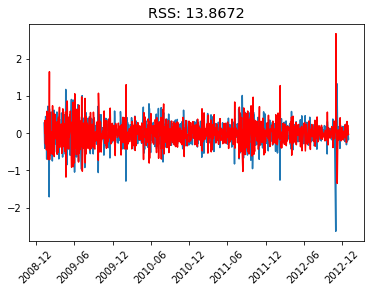

0 1 2


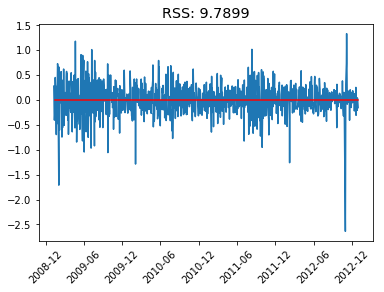

0 2 0


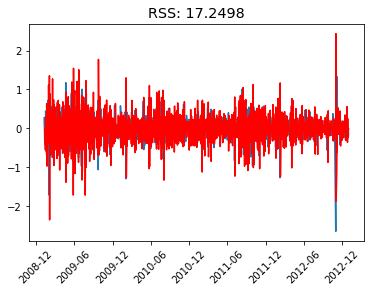

0 2 1


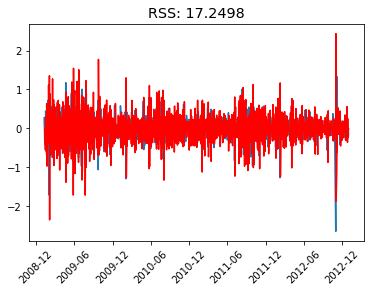

0 2 2


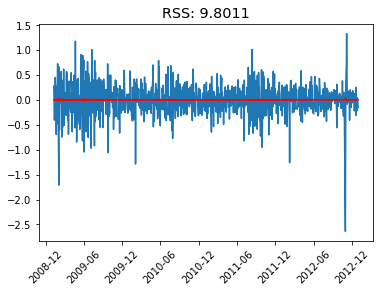

1 0 0
9.13587016765756


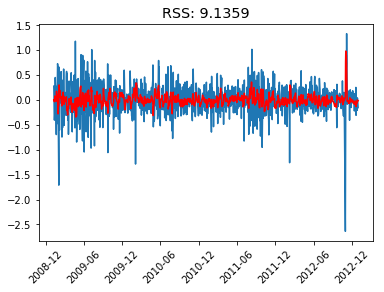

1 0 1
9.065257886924407


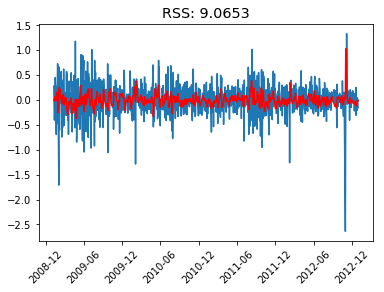

1 0 2


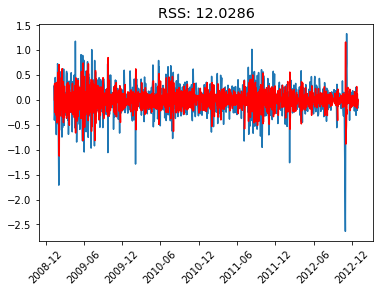

1 1 0


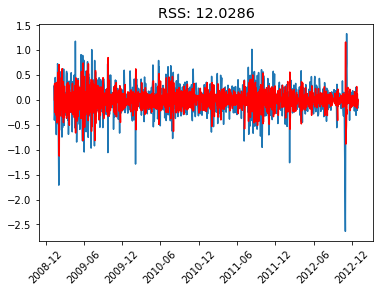

1 1 1


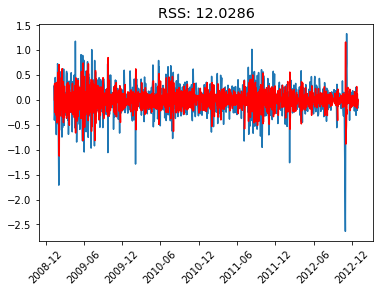

1 1 2


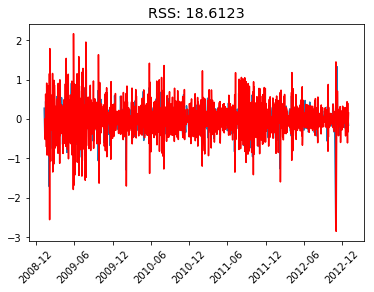

1 2 0


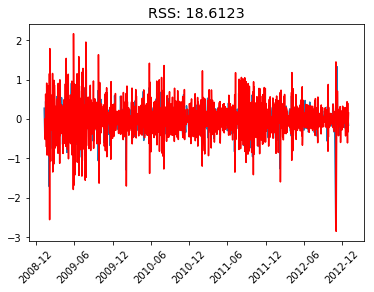

1 2 1


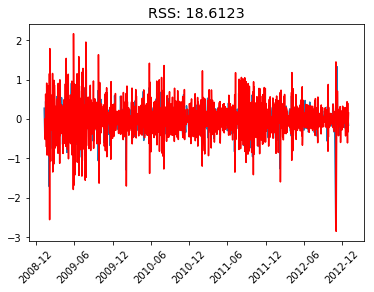

1 2 2


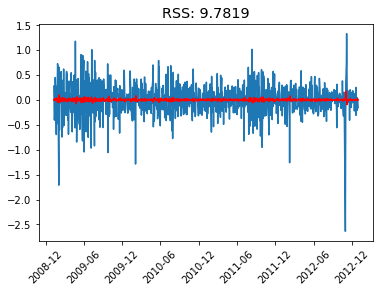

2 0 0


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


9.044063548371474


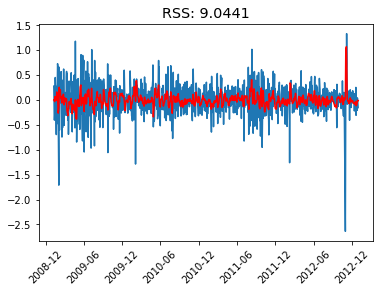

2 0 1


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


8.999063401533324


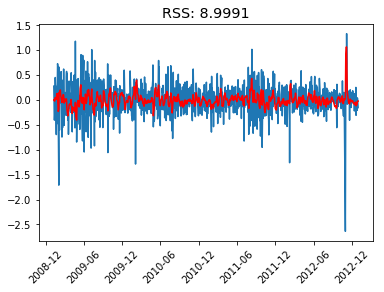

2 0 2


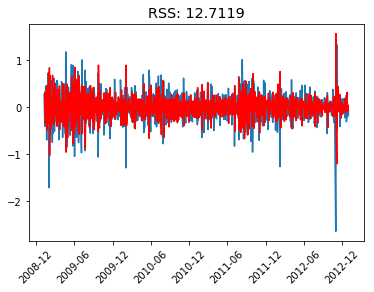

2 1 0


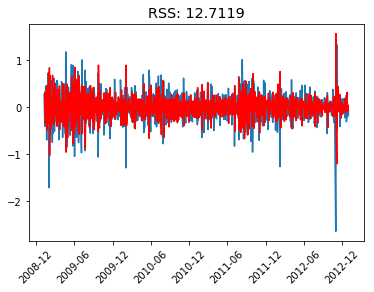

2 1 1


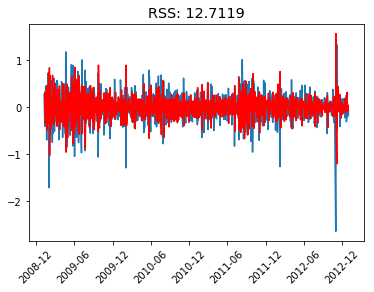

2 1 2


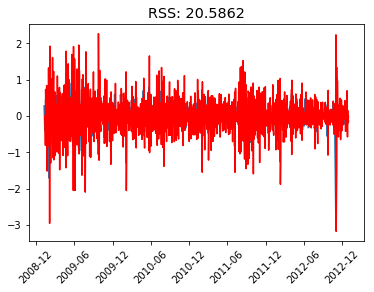

2 2 0


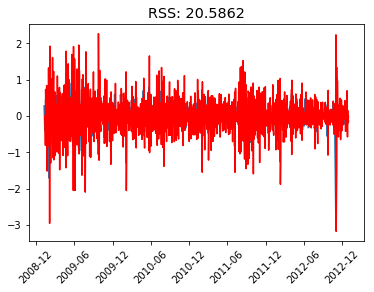

2 2 1


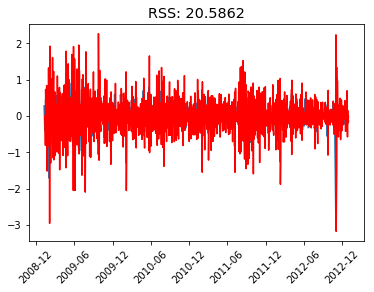

2 2 2


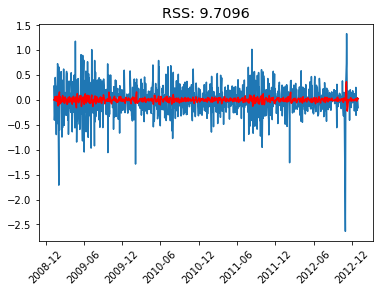

3 0 0


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


8.991082304237375


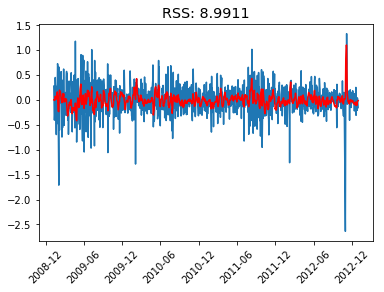

3 0 1


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


8.987194998330374


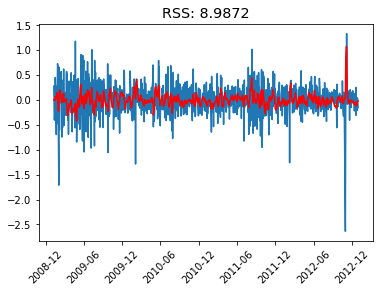

3 0 2


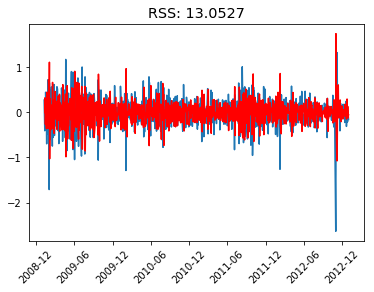

3 1 0


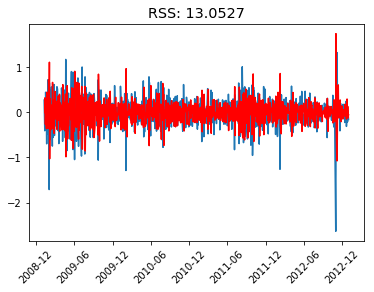

3 1 1


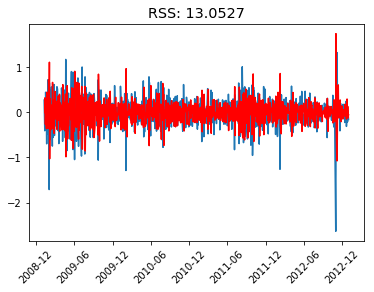

3 1 2


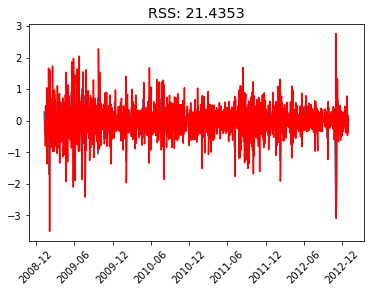

3 2 0


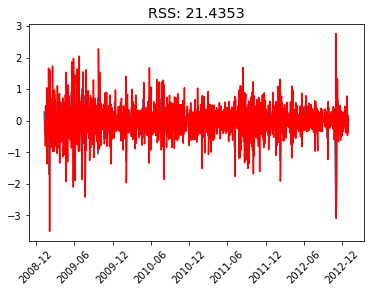

3 2 1


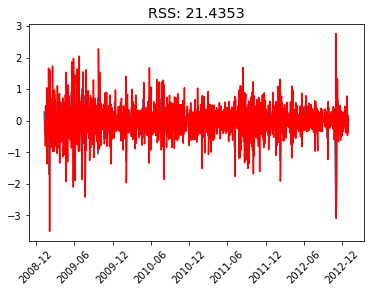

3 2 2


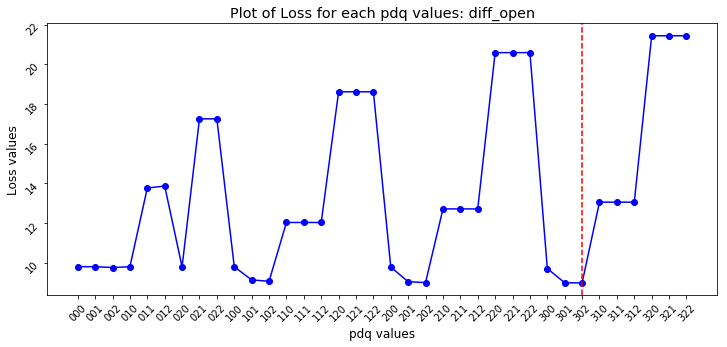

Best p,d,q value:  [3, 0, 2] , Best Loss Value:  8.987194998330374
Guessed p,d,q value:  101 , Loss at guessed values:  9.13587016765756


In [56]:
# initilize with the guessed values of p, d, q parameters
p=1
d=0
q=1
guessed_int = str(p)+str(d)+str(q)
fitArima(diff_open, p, d, q)
brute_dict = run_bruteForce(diff_open, label='diff_open')
print("Best p,d,q value: ", brute_dict['best_ints'], ", Best Loss Value: ", brute_dict['loss_best'])
print("Guessed p,d,q value: ", guessed_int, ", Loss at guessed values: ", 
      brute_dict['loss_values'][brute_dict['pdq_values'].index(guessed_int)])

In [61]:
print("Simplest efficient p,d,q value from graph: ", '301', ", Loss for simplest accurate model: ", 
      brute_dict['loss_values'][brute_dict['pdq_values'].index('301')])

Simplest efficient p,d,q value from graph:  301 , Loss for simplest accurate model:  8.991082304237375


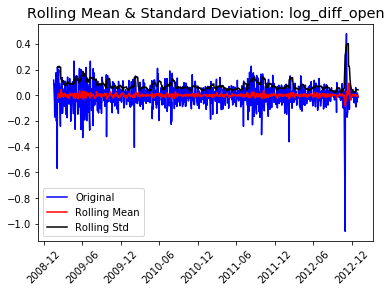

Results of Dickey-Fuller Test:
Test Statistic                -1.273446e+01
p-value                        9.224736e-24
#Lags Used                     2.200000e+01
Number of Observations Used    9.730000e+02
Critical Value (1%)           -3.437089e+00
Critical Value (5%)           -2.864515e+00
Critical Value (10%)          -2.568354e+00
dtype: float64


In [62]:
min_val = min(diff_open)
positive_diff_open = diff_open + abs(min_val) + 1
log_diff_open = np.log(positive_diff_open)
log_moving_avg = log_diff_open.rolling(6).mean()
log_diff_open=(log_diff_open - log_moving_avg).dropna()
log_diff_open.index = pd.to_datetime(log_diff_open.index)
test_stationarity(log_diff_open, label='log_diff_open')

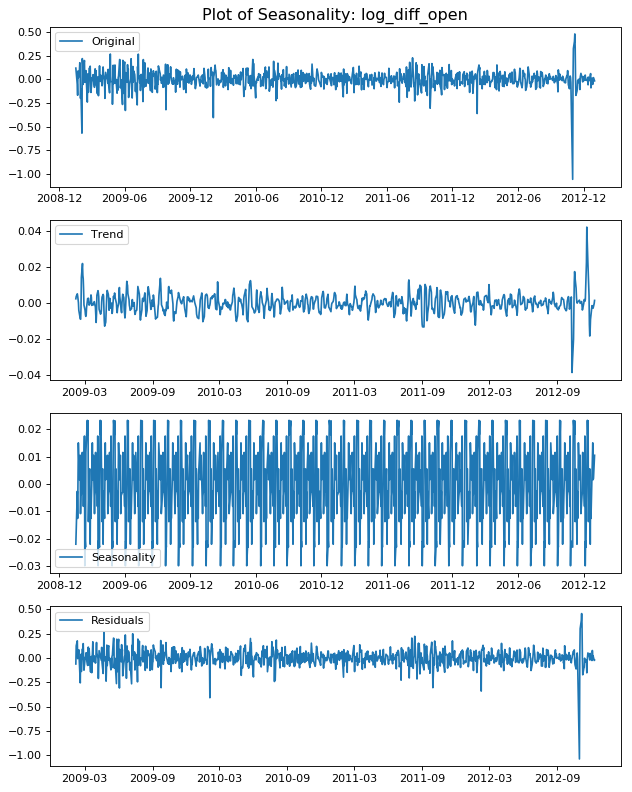

In [63]:
plot_seasonality(log_diff_open, freq=26, label='log_diff_open')

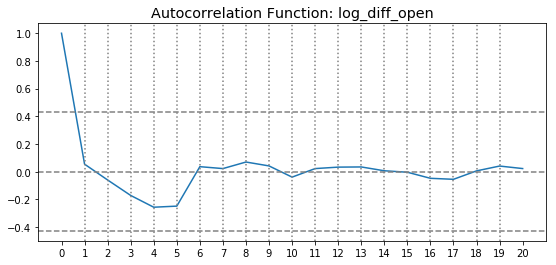

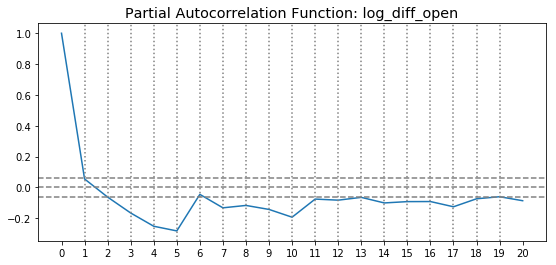

In [64]:
plot_autocorrelation(log_diff_open, 'log_diff_open')
plot_partial_autocorrelation(log_diff_open, 'log_diff_open')

                              ARMA Model Results                              
Dep. Variable:                   open   No. Observations:                  996
Model:                     ARMA(1, 1)   Log Likelihood                1074.095
Method:                       css-mle   S.D. of innovations              0.082
Date:                Mon, 22 Oct 2018   AIC                          -2140.190
Time:                        19:38:05   BIC                          -2120.575
Sample:                    01-16-2009   HQIC                         -2132.733
                         - 12-31-2012                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.713e-06   2.53e-05      0.147      0.883   -4.59e-05    5.33e-05
ar.L1.open     0.6447      0.024     26.552      0.000       0.597       0.692
ma.L1.open    -1.0000      0.003   -391.461      0.0

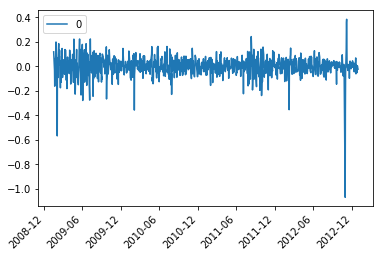

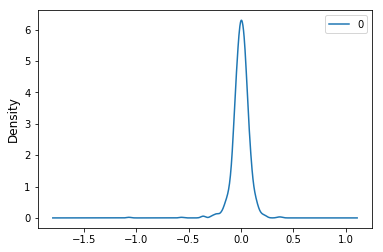

                0
count  996.000000
mean     0.000978
std      0.082518
min     -1.069456
25%     -0.037132
50%      0.004320
75%      0.043809
max      0.384053
2.857086203287909


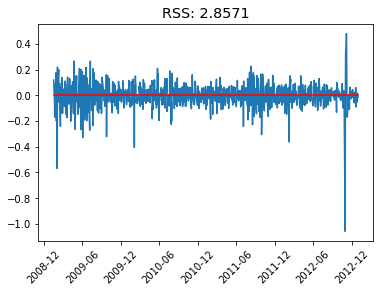

0 0 0
2.8523577995242304


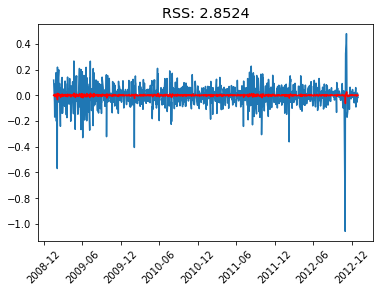

0 0 1
2.8465075277670624


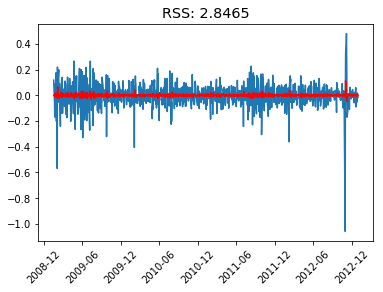

0 0 2


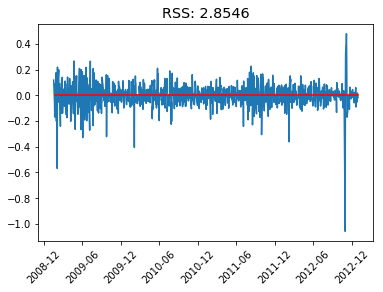

0 1 0


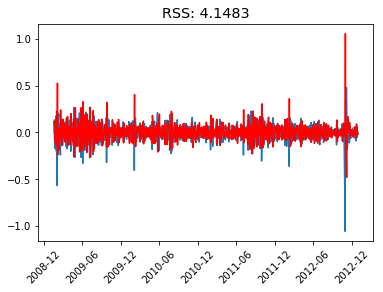

0 1 1


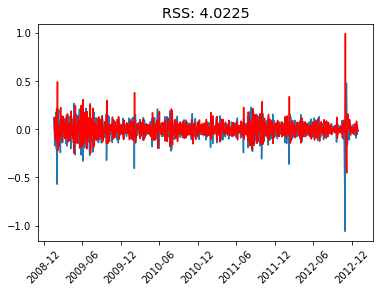

0 1 2


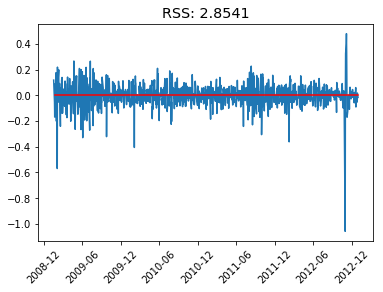

0 2 0


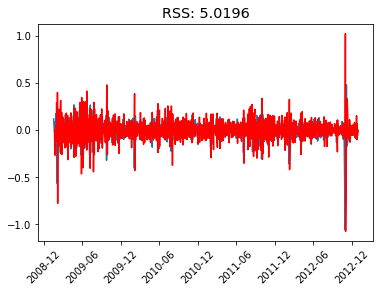

0 2 1


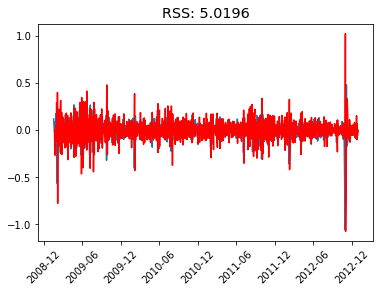

0 2 2


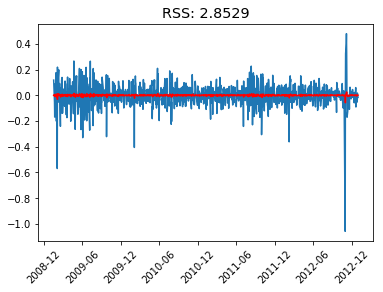

1 0 0
2.6031149423412385


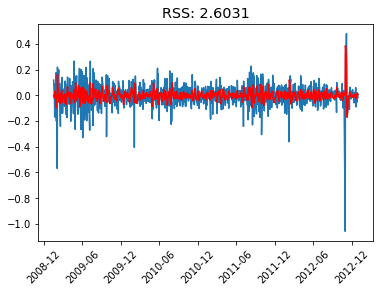

1 0 1


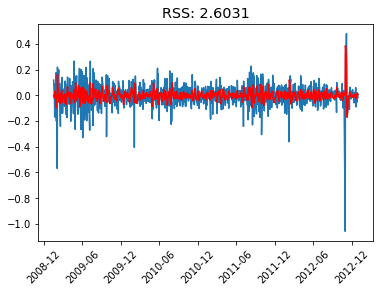

1 0 2


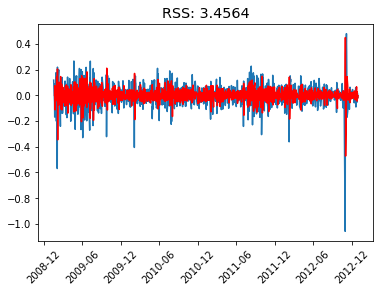

1 1 0


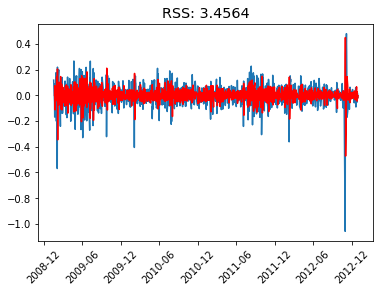

1 1 1


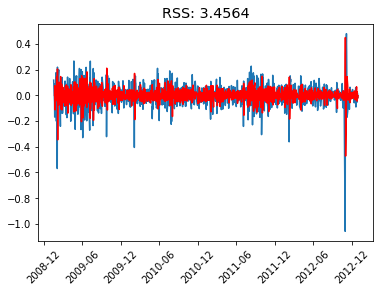

1 1 2


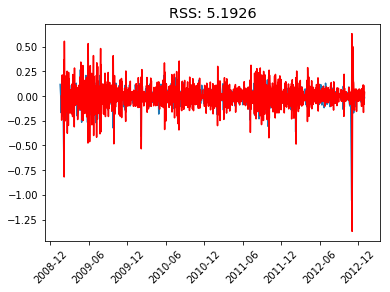

1 2 0


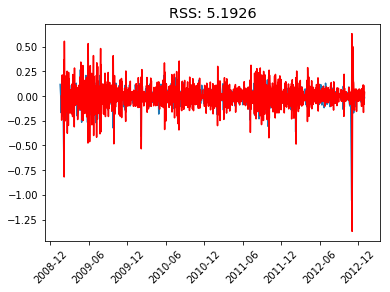

1 2 1


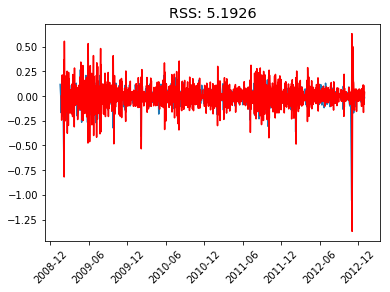

1 2 2


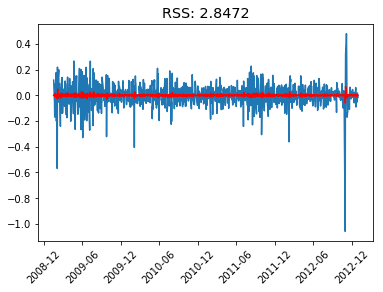

2 0 0


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2.49934945627744


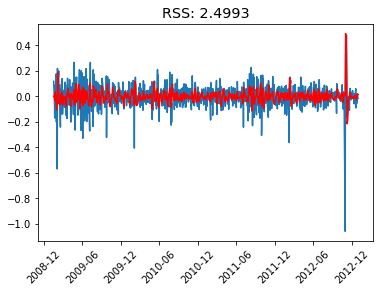

2 0 1


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:629: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:629: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: overflow encountered in exp
  

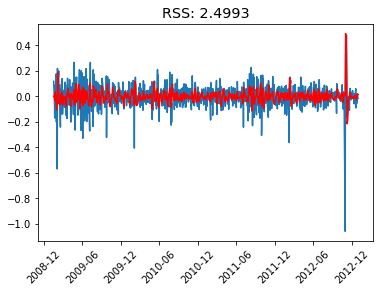

2 0 2


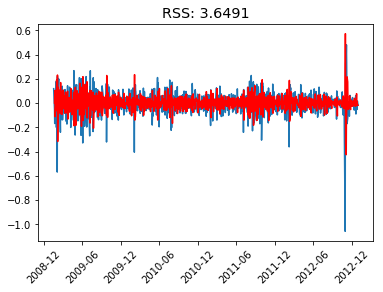

2 1 0


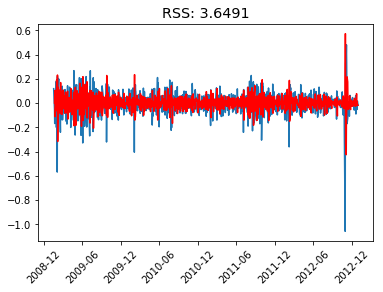

2 1 1


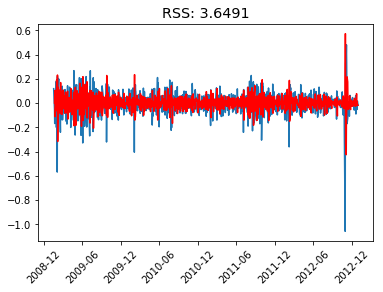

2 1 2


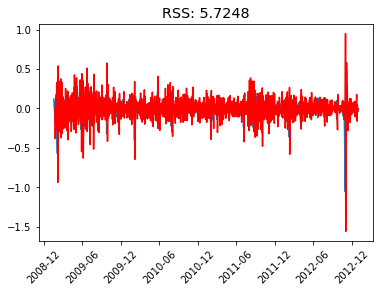

2 2 0


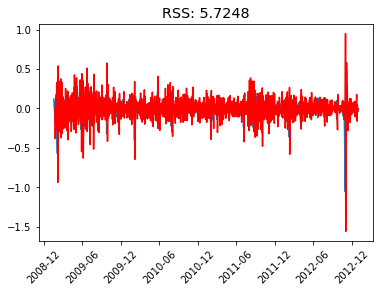

2 2 1


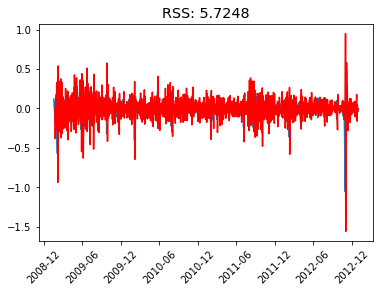

2 2 2


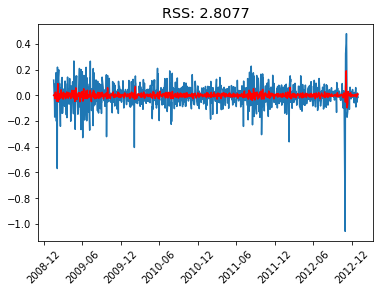

3 0 0


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2.438094155134251


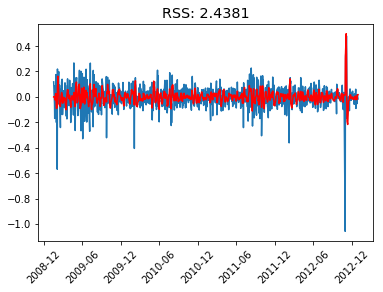

3 0 1


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2.425232542436368


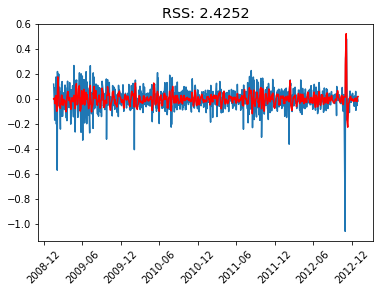

3 0 2


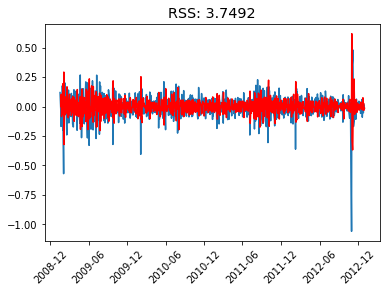

3 1 0


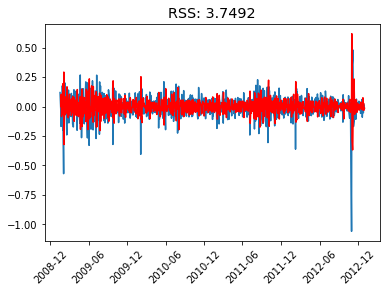

3 1 1


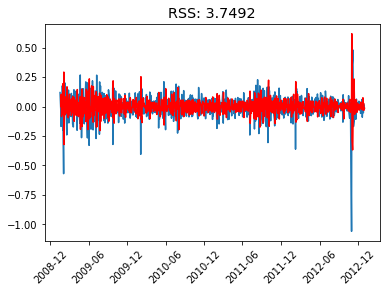

3 1 2


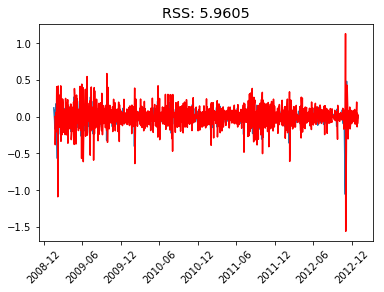

3 2 0


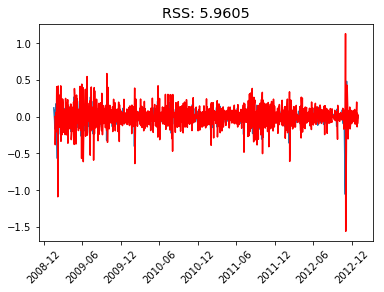

3 2 1


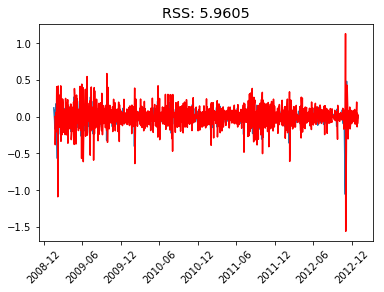

3 2 2


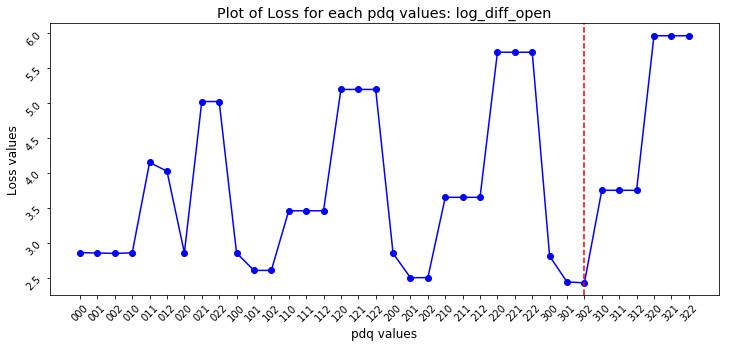

Best p,d,q value:  [3, 0, 2] , Best Loss Value:  2.425232542436368
Guessed p,d,q value:  101 , Loss at guessed values:  2.6031149423412385


In [65]:
# initilize with the guessed values of p, d, q parameters
p=1
d=0
q=1
guessed_int = str(p)+str(d)+str(q)
fitArima(log_diff_open, p, d, q)
brute_dict = run_bruteForce(log_diff_open, label='log_diff_open')
print("Best p,d,q value: ", brute_dict['best_ints'], ", Best Loss Value: ", brute_dict['loss_best'])
print("Guessed p,d,q value: ", guessed_int, ", Loss at guessed values: ", 
      brute_dict['loss_values'][brute_dict['pdq_values'].index(guessed_int)])

In [66]:
print("Simplest efficient p,d,q value from graph: ", '301', ", Loss for simplest accurate model: ", 
      brute_dict['loss_values'][brute_dict['pdq_values'].index('301')])

Simplest efficient p,d,q value from graph:  301 , Loss for simplest accurate model:  2.438094155134251
